# Data analysis notebook for EDA project

This is the data analysis notebook part of the EDA project. First of the notebook describes Exploratory Data Analysis pipeline for the Loan data and second part contains loan data analysis and visualisation.

In [314]:
import pandas as pd

In [315]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [316]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np

In [317]:
import warnings
warnings.filterwarnings('ignore')

In [318]:
#from dataprep.eda import plot as plot_eda

In [319]:
from eda_utils import DataTransform, DataFrameInfo, DataFrameVisualize, DataFrameTransform

In [320]:
df = pd.read_csv("data/loan_payments.csv")

In [321]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


Dataprep is an useful tool to automate some of the EDA tasks. Here the plot_eda function is used to plot all columns. 

In [322]:
#plot_eda(df)

Next we instantiate the helper classes that we ll be used throughout the notebook to perfrom data cleaning, data transformatuon and plotting.

In [323]:
data_transform = DataTransform()
dataframe_transform = DataFrameTransform()
data_plot = DataFrameVisualize()
dataframe_info = DataFrameInfo()

Let's find out some information about the datasets. 

In [324]:
df.shape

(54231, 43)

In [325]:
df.describe()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,5.423100e+04,5.423100e+04,54231.000000,51224.000000,54231.000000,49062.000000,54231.000000,5.423100e+04,54231.000000,54231.000000,54231.000000,23229.00000,6181.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54180.000000,7499.000000,54231.0
mean,7.621797e+06,8.655350e+06,13333.076100,13229.509117,12952.622979,13.507328,400.013953,7.222085e+04,15.867087,0.241799,0.893843,34.01920,74.829154,10.559809,24.168206,2753.964172,2752.568147,12079.208480,11788.946618,9407.048589,2577.757101,0.901512,93.501288,10.859057,3130.706393,0.004208,42.253634,1.0
std,9.571362e+06,1.031281e+07,8082.196709,8019.017599,8099.473527,4.392893,238.920012,5.158934e+04,7.623124,0.706706,1.261421,21.92324,36.137264,4.797169,11.587025,5154.893646,5153.043643,8391.043845,8363.508506,6958.124264,2581.657345,6.215792,630.843636,120.193950,5323.801675,0.070990,21.052360,0.0
min,5.552100e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,3.300000e+03,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.594330e+05,9.587720e+05,7000.000000,7000.000000,6700.000000,10.370000,224.205000,4.500000e+04,10.200000,0.000000,0.000000,15.00000,53.000000,7.000000,16.000000,0.000000,0.000000,5895.210000,5658.815000,4264.350000,889.560000,0.000000,0.000000,0.000000,289.790000,0.000000,26.000000,1.0
50%,7.084590e+06,8.709873e+06,12000.000000,12000.000000,11300.000000,13.160000,347.150000,6.100000e+04,15.600000,0.000000,1.000000,31.00000,87.000000,10.000000,23.000000,0.000000,0.000000,10113.250000,9835.830000,7644.920000,1734.640000,0.000000,0.000000,0.000000,562.670000,0.000000,42.000000,1.0
75%,8.860616e+06,1.052714e+07,18000.000000,18000.000000,18000.000000,16.200000,527.550000,8.600000e+04,21.260000,0.000000,1.000000,49.00000,103.000000,13.000000,31.000000,3397.325000,3394.980000,16272.895000,15978.200000,12505.625000,3323.765000,0.000000,0.000000,0.000000,3738.120000,0.000000,59.000000,1.0
max,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,2.039784e+06,39.910000,18.000000,33.000000,146.00000,119.000000,53.000000,108.000000,32399.940000,32399.940000,55758.222084,55061.000000,35000.020000,23062.450000,358.680000,27750.000000,7002.190000,36115.200000,4.000000,146.000000,1.0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

## Handling of missing values in columns

From this output we can see that there are several columns with missing values. Let's create a list of columns with missing values and find out what percentage of the data are missing in those columns. 


In [327]:
list_of_columns_with_missing_values = dataframe_info.list_all_columns_with_missing_values(df)
list_of_columns_with_missing_values

['funded_amount',
 'term',
 'int_rate',
 'employment_length',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog']

Let's find out which are column in this list have numeric values and which ones are having other types. 

In [328]:
dataframe_info.get_column_type_of_list_of_columns(df, list_of_columns_with_missing_values)

Type of funded_amount: float64
Type of term: object
Type of int_rate: float64
Type of employment_length: object
Type of mths_since_last_delinq: float64
Type of mths_since_last_record: float64
Type of last_payment_date: object
Type of next_payment_date: object
Type of last_credit_pull_date: object
Type of collections_12_mths_ex_med: float64
Type of mths_since_last_major_derog: float64


In [329]:
dataframe_info.count_null_values_percentage(df, list_of_columns_with_missing_values)

Percentage of nulls in funded_amount: 0.05544799100145673
Percentage of nulls in term: 0.08799395179878668
Percentage of nulls in int_rate: 0.09531448802345521
Percentage of nulls in employment_length: 0.03905515295679593
Percentage of nulls in mths_since_last_delinq: 0.5716656524865852
Percentage of nulls in mths_since_last_record: 0.8860245984768859
Percentage of nulls in last_payment_date: 0.0013460935627224281
Percentage of nulls in next_payment_date: 0.6012797108664786
Percentage of nulls in last_credit_pull_date: 0.000129077464918589
Percentage of nulls in collections_12_mths_ex_med: 0.0009404215301211485
Percentage of nulls in mths_since_last_major_derog: 0.8617211557965001


columns like "mths_since_last_delinq", "mths_since_last_record", "next_payment_date" and "mths_since_last_major_derog" have over 50% data missing. We will drop those columns. 

In [330]:
df.drop(columns=["mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"], inplace= True)

In [331]:
df.shape

(54231, 39)

Now we check other columns in this list and decide how we can impute those missing values.
Column funded_amount has around 5 % missing values. Lets look at this column. 

<AxesSubplot:xlabel='funded_amount', ylabel='Count'>

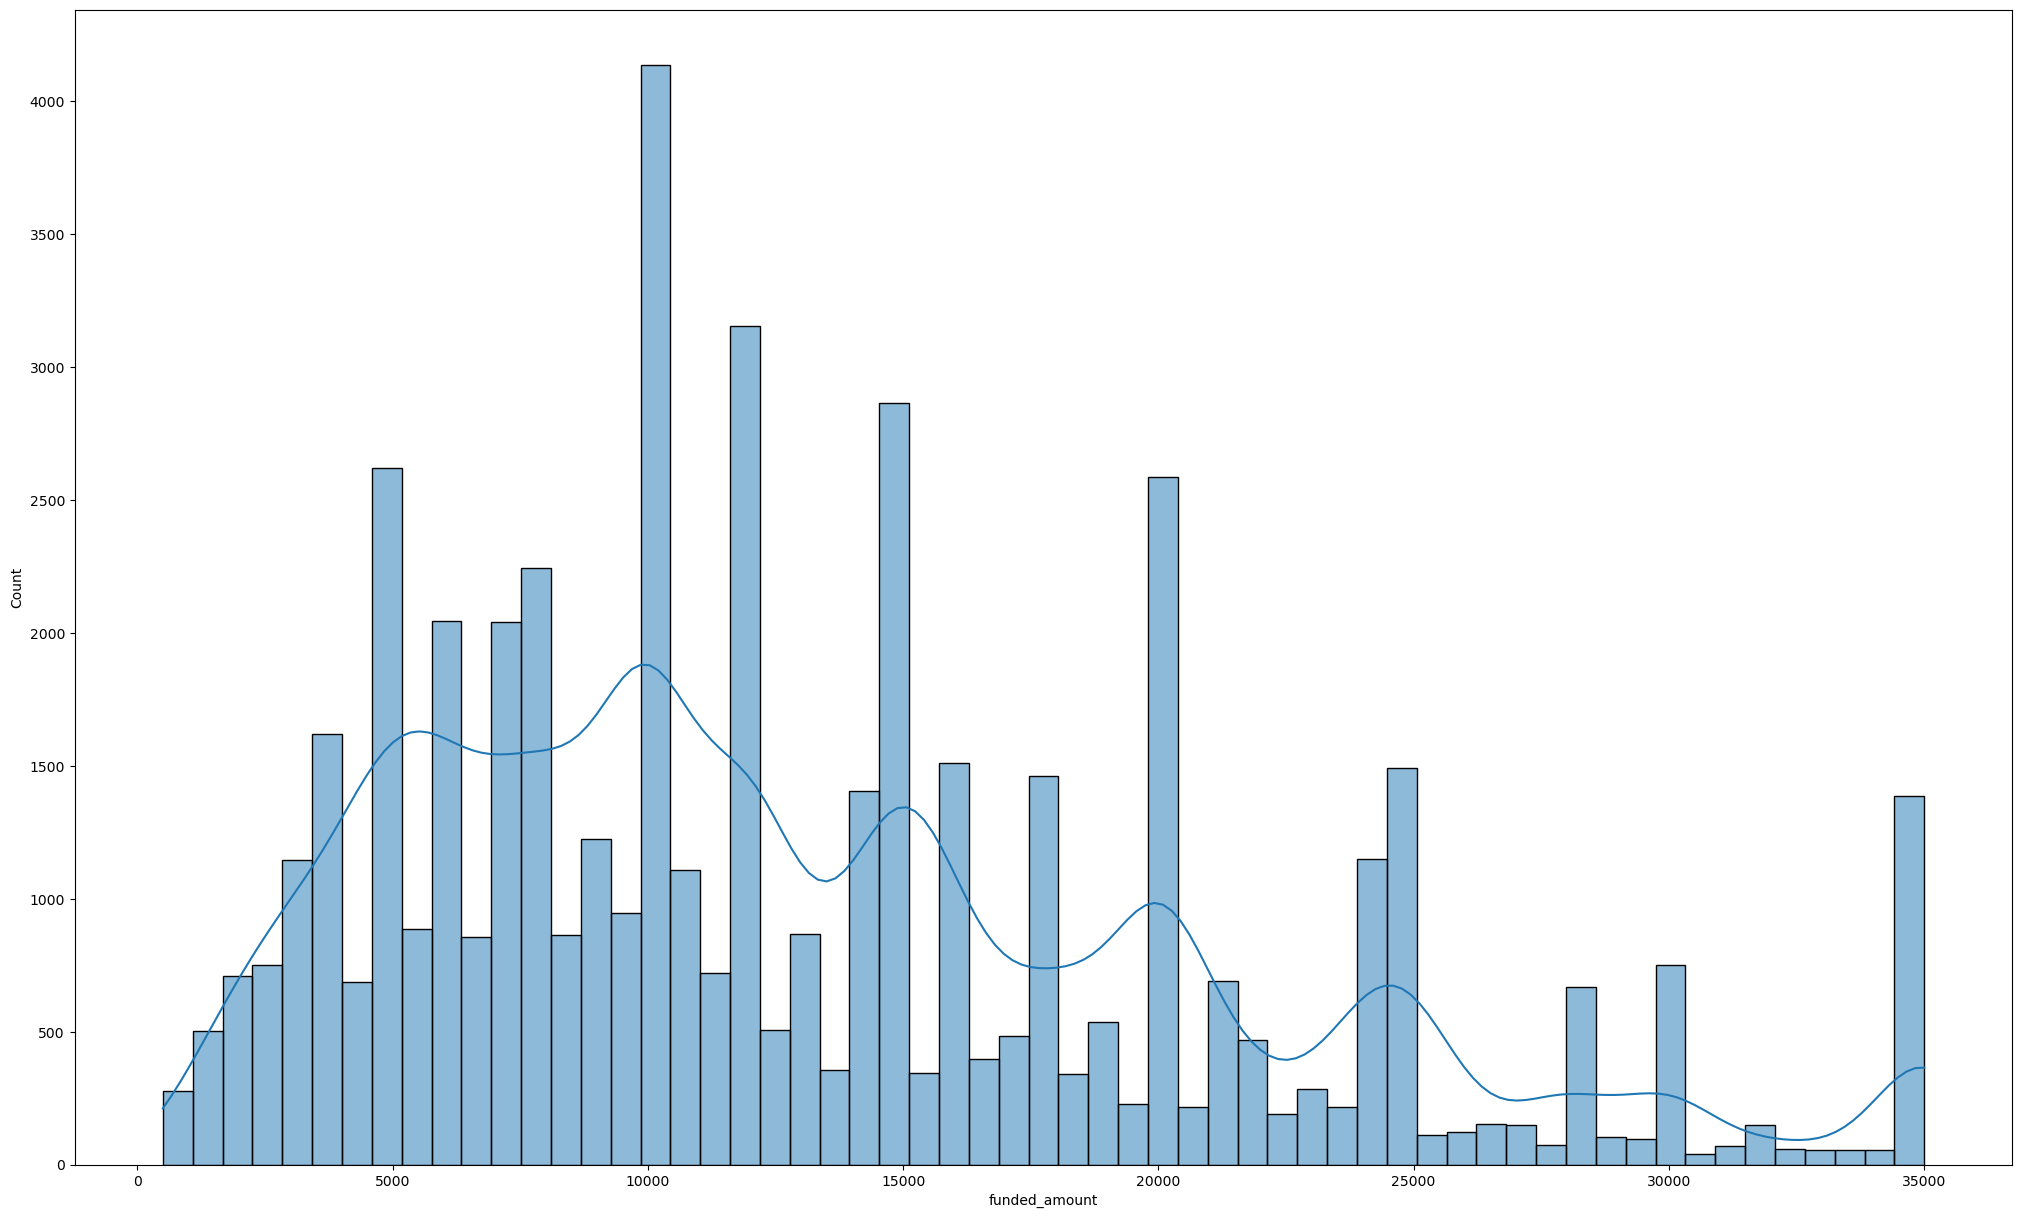

In [332]:
data_plot.plot_histogram(df, "funded_amount")

The data for funded_amount is sufficiently smoothed though it has some spikes. This is the the total amount committed by investors for that loan at that point in time. So there might be some event for those higher deposit. But we can smooth it later. Let's find out mean and median of these column and we will use the median values to fill the missing rows.

In [333]:
dataframe_info.get_df_mean(df, "funded_amount")

mean: 13229.50911682024, median: 12000.0, mode: 10000.0


In [334]:
df = dataframe_transform.fill_null_values_with_median(df, "funded_amount")

In [335]:
len(df["funded_amount"].to_list())

54231

Next "term" column. It has got around 8% data missing and it is a categorical column and has two values. We will remove all the rows that have null values for this column. Also, when we are at it we will remove the word months from the column values and add it to the column name.  

<AxesSubplot:xlabel='term', ylabel='count'>

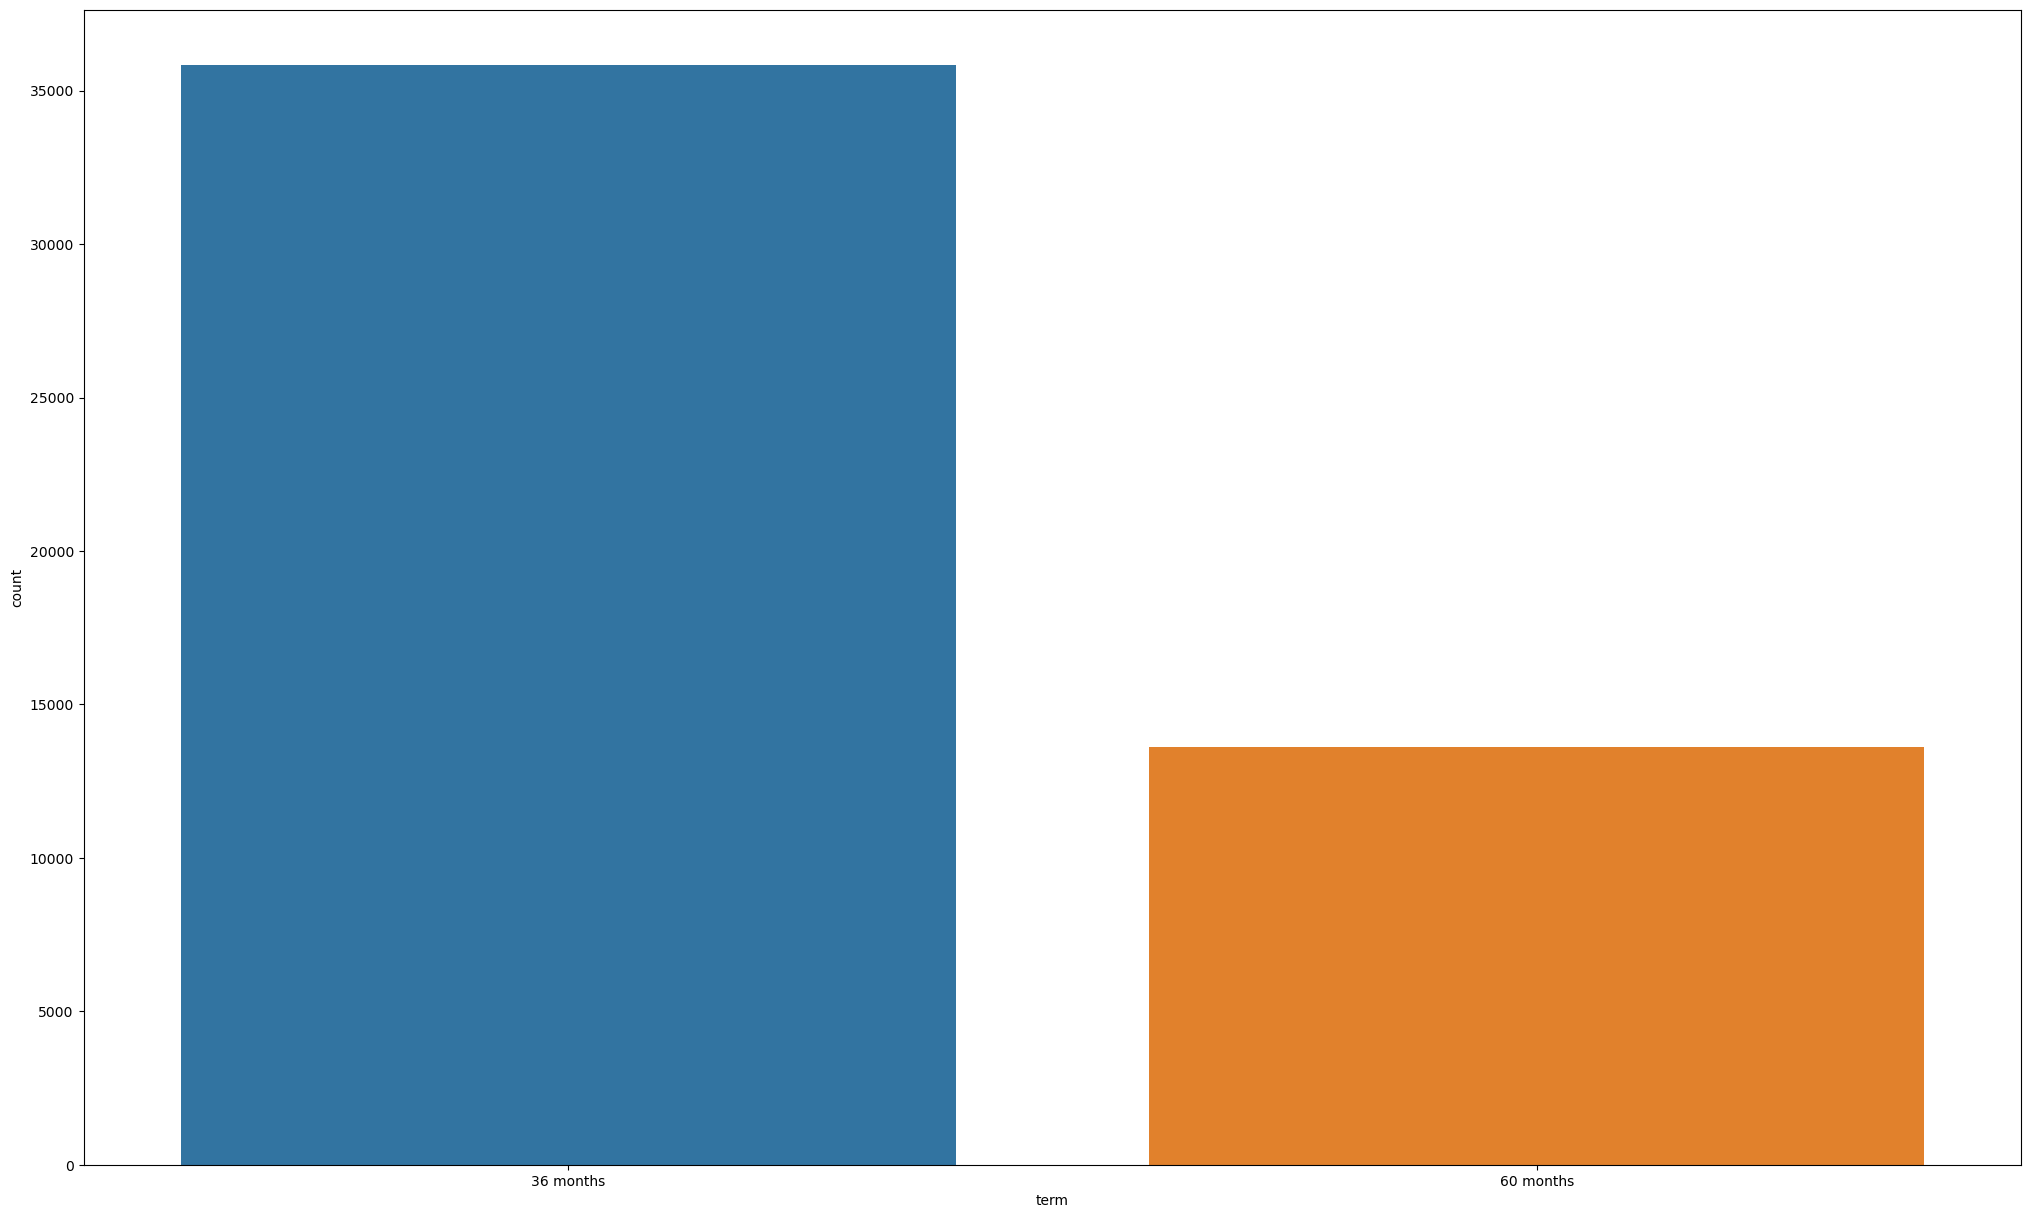

In [336]:
sns.countplot(df, x="term")

In [337]:
df.dropna(subset=['term'], inplace=True)

In [338]:
df.shape

(49459, 39)

In [339]:
df["term"] = df["term"].str.replace("months", "")

In [340]:
df["term"].head()

0    36 
1    36 
2    36 
3    36 
4    36 
Name: term, dtype: object

In [341]:
df = df.rename(columns={"term": "term_in_months"})

In [342]:
df = df.astype({"term_in_months": int}) 

We will next look at "int_rate" column. This also seems like normally distributed from the plot above. We will also impute with median values. 

In [343]:
df = dataframe_transform.fill_null_values_with_median(df, "int_rate")

In [344]:
len(df["int_rate"].to_list())

49459

Next we look at 'employment_length' column. This is categorical data and around 3% data are missing. 

<AxesSubplot:title={'center':'employment_length'}, xlabel='Values', ylabel='Probability'>

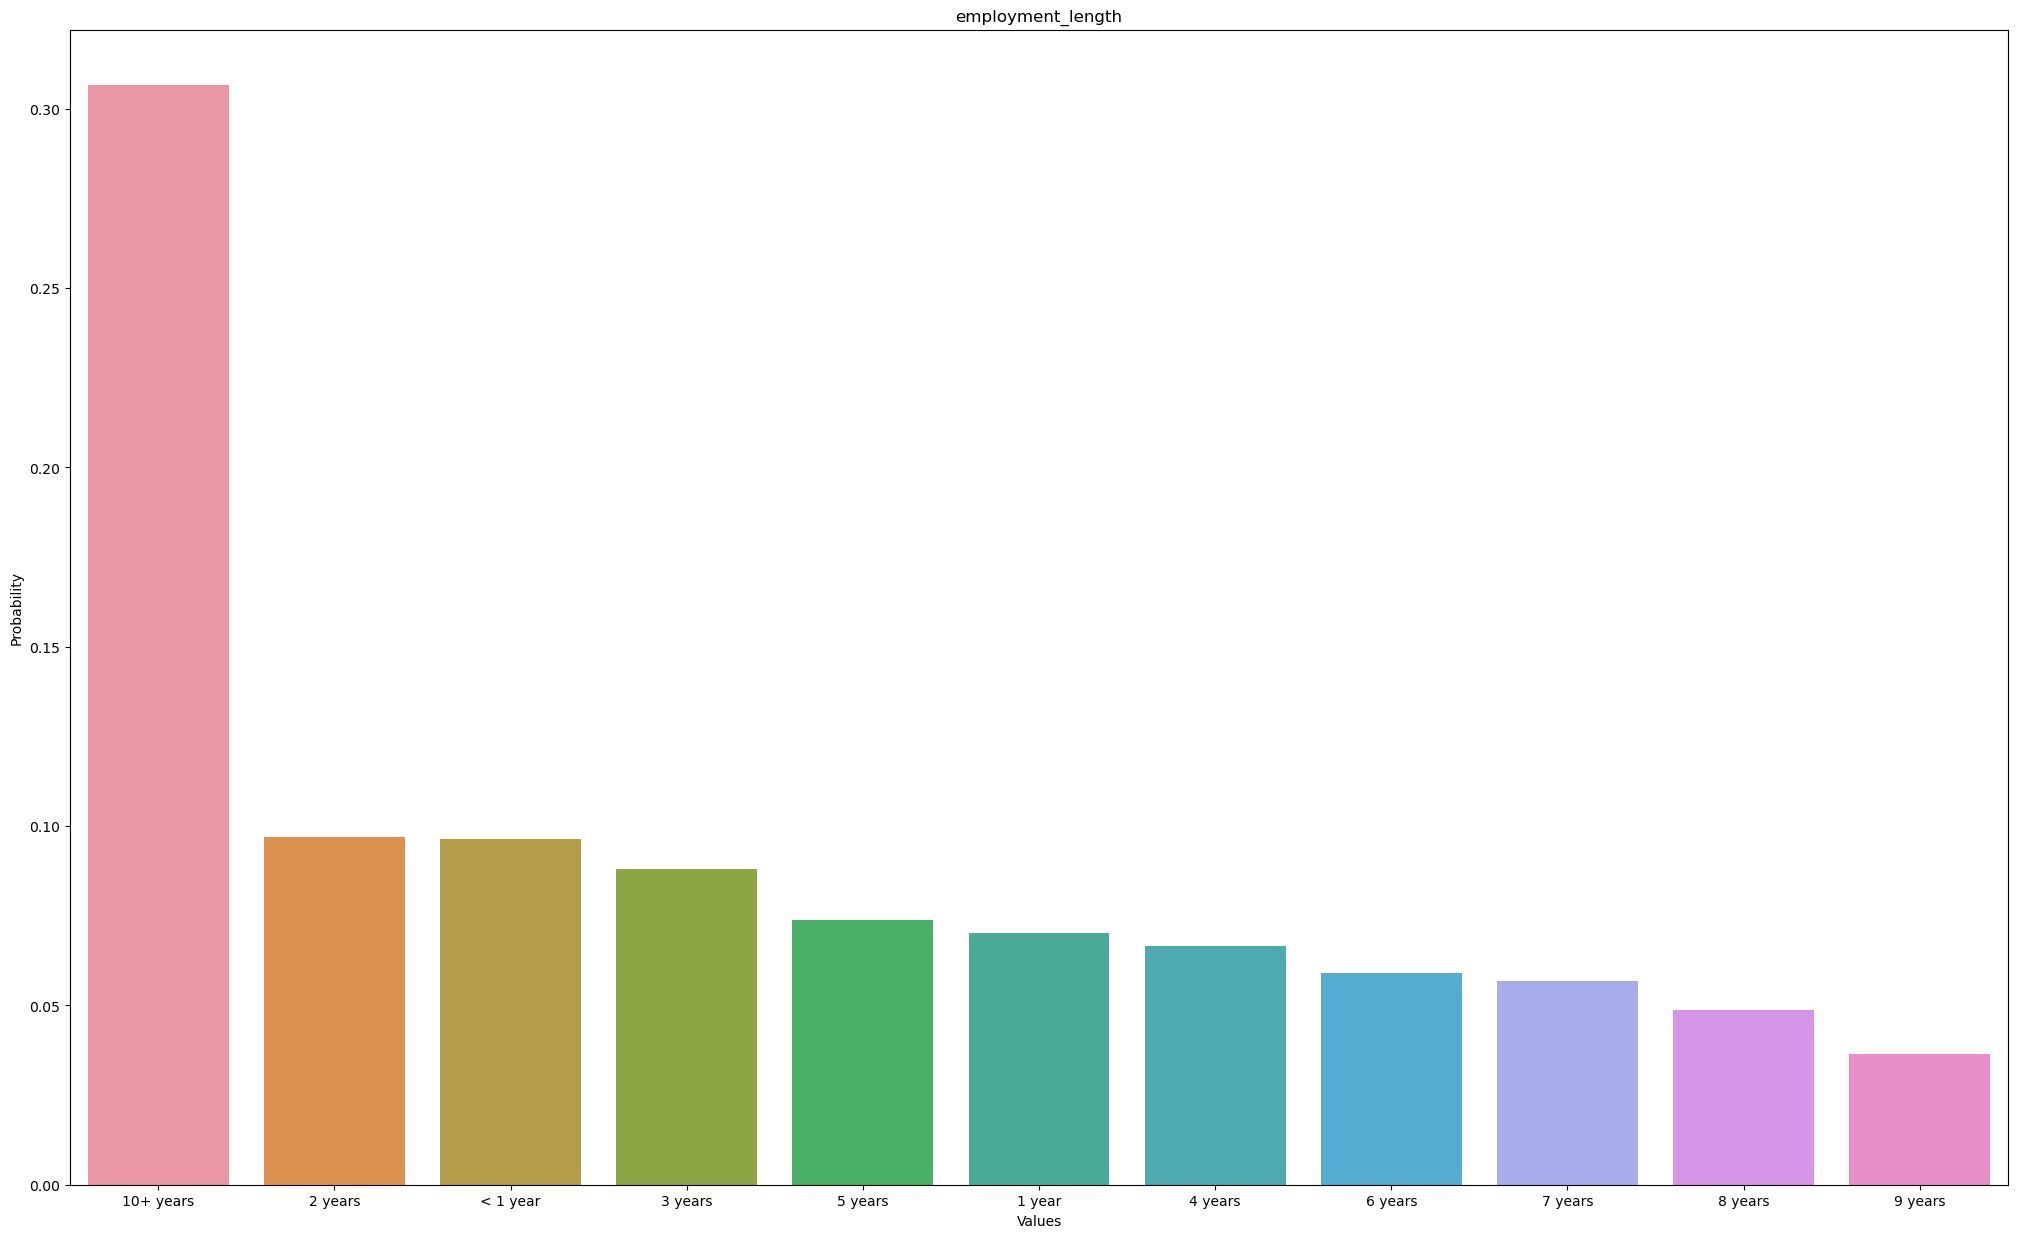

In [345]:
data_plot.plot_prob_distribution(df, "employment_length")

It is probably safe to assume that null values are not randomly distributed. We can check the probablity distribution plot below. So we will fill the missing values with most occuring value which is of employment length of > 10+ years. 

In [346]:
df = dataframe_transform.fill_null_values_with_most_frequent_value(df, "employment_length")

In [347]:
df.shape

(49459, 39)

Lets check the plot again to see if that increases in 10+ years.

<AxesSubplot:title={'center':'employment_length'}, xlabel='Values', ylabel='Probability'>

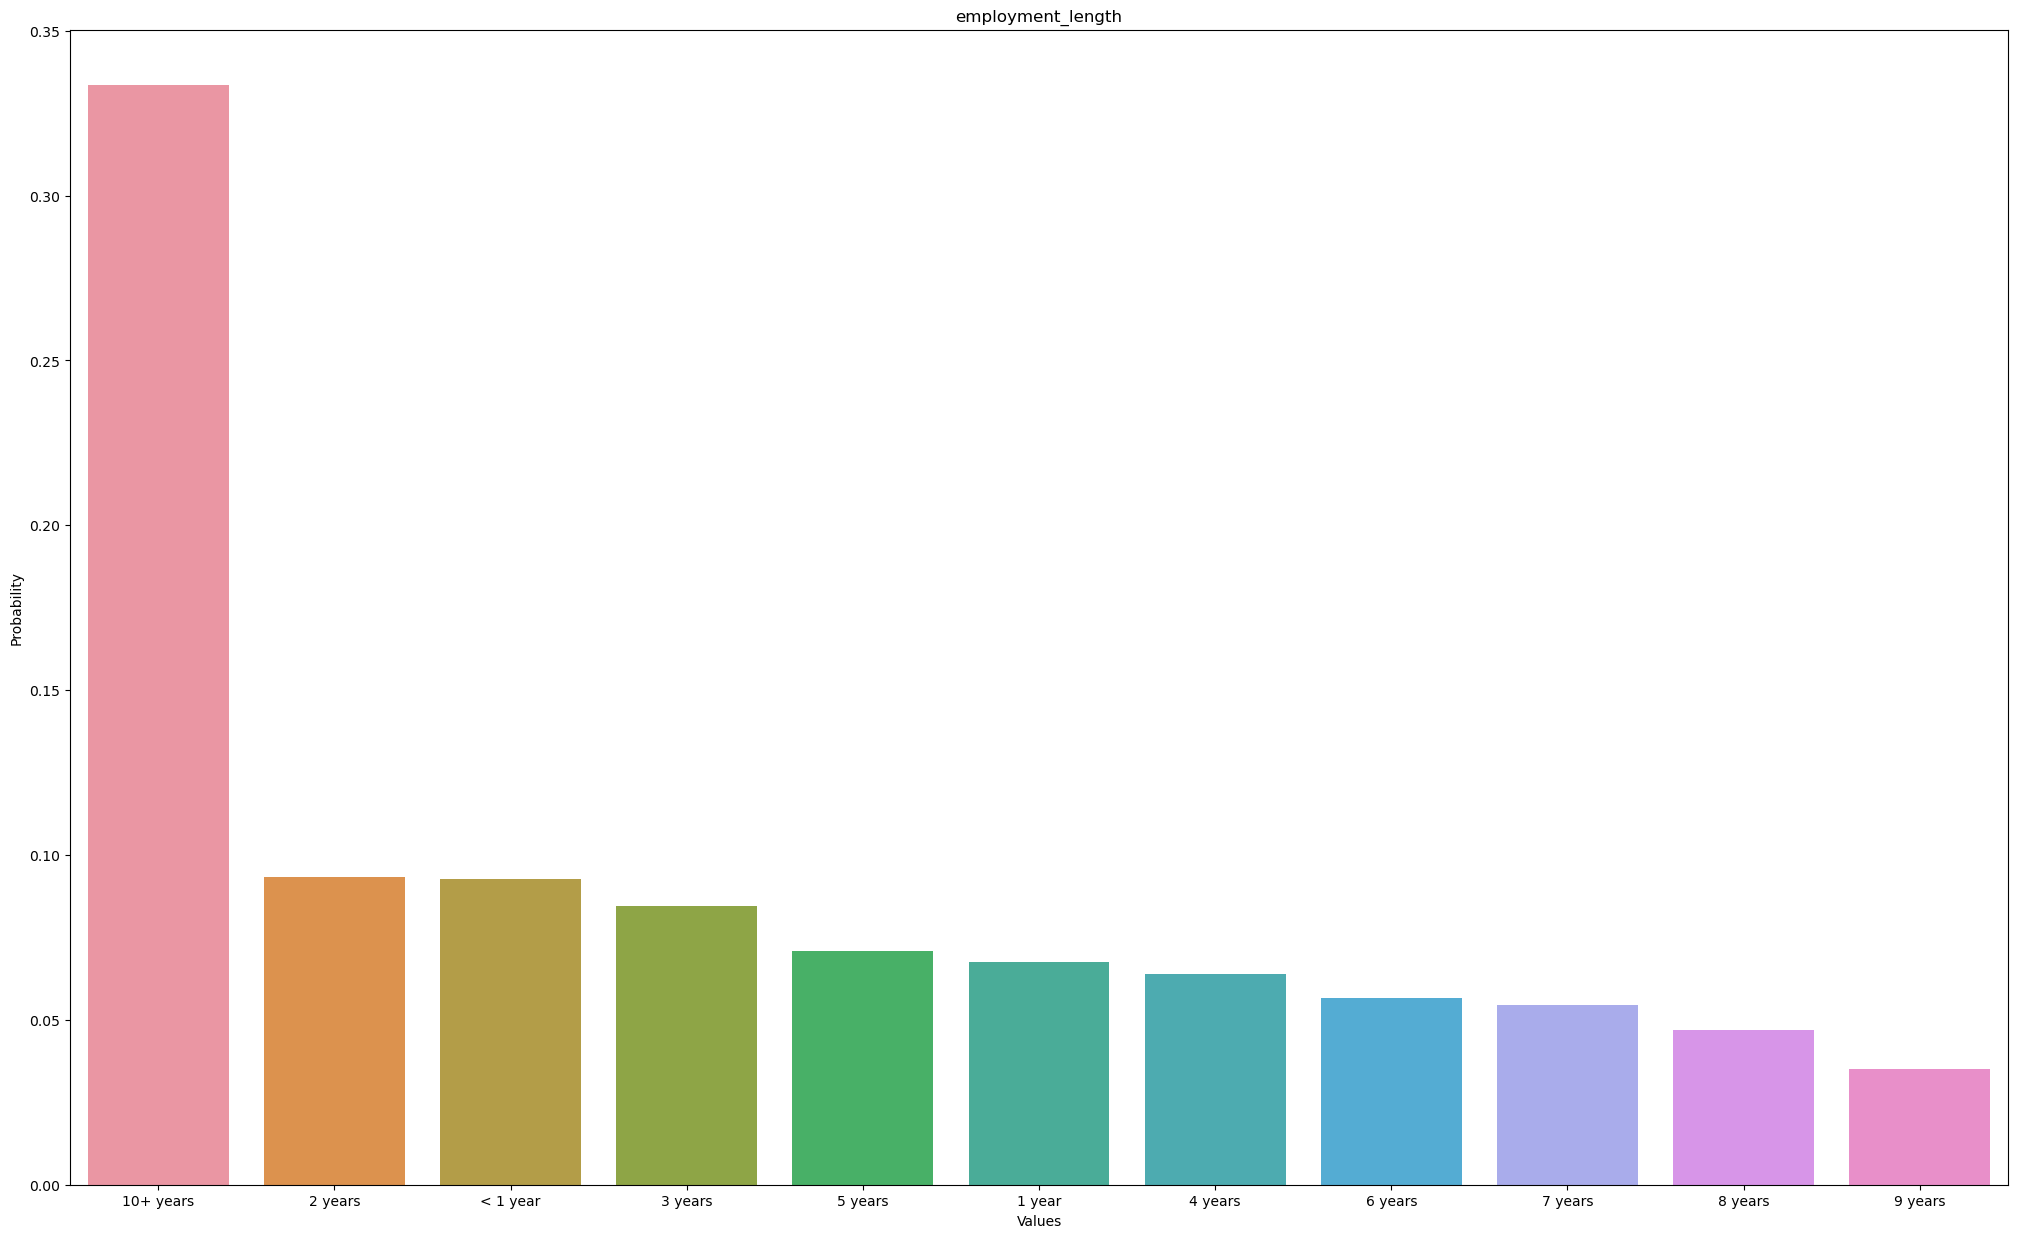

In [348]:
data_plot.plot_prob_distribution(df, "employment_length")

We will also clean the column values by removing years and symbols from it. We will also add 1 to each category so that 0-1 years will be considered as upto 1 years , 1-2 as 2 ans so on. 

In [349]:
df["employment_length"] = df["employment_length"].str.replace("year.*", "").str.replace("< 1", "0").str.replace("+", "").astype(int)

In [350]:
(df["employment_length"].value_counts())

10    16500
2      4614
0      4587
3      4188
5      3512
1      3336
4      3164
6      2800
7      2702
8      2317
9      1739
Name: employment_length, dtype: int64

In [351]:
df["employment_length"] = df["employment_length"] + 1


In [352]:
(df["employment_length"].value_counts())

11    16500
3      4614
1      4587
4      4188
6      3512
2      3336
5      3164
7      2800
8      2702
9      2317
10     1739
Name: employment_length, dtype: int64

Next we will look at column "last_payment_date". This column is a date time column but present in a different format (e.g. May-2021). We will correct the format of this column and the other related columns. There are four remaining columns with same kind of data "last_credit_pull_date", "last_payment_date", "issue_date:" and "earliest_credit_line" (we already dropped "next_payment_date"). 

In [353]:
dt_columns = ["last_credit_pull_date", "last_payment_date", "issue_date","earliest_credit_line",]

In [354]:
df.shape

(49459, 39)

In [355]:
dataframe_info.get_column_type_of_list_of_columns(df, dt_columns)

Type of last_credit_pull_date: object
Type of last_payment_date: object
Type of issue_date: object
Type of earliest_credit_line: object


Now we will change these columns to have proper date time format

In [356]:
df = data_transform.change_date_format(df, column_name="last_credit_pull_date")

In [357]:
df = data_transform.change_date_format(df, column_name="last_payment_date")

In [358]:
df = data_transform.change_date_format(df, column_name="issue_date")

In [359]:
df = data_transform.change_date_format(df, column_name="earliest_credit_line")

Lets check again if the columns have got correct format 

In [360]:
dataframe_info.get_column_type_of_list_of_columns(df, dt_columns)

Type of last_credit_pull_date: datetime64[ns]
Type of last_payment_date: datetime64[ns]
Type of issue_date: datetime64[ns]
Type of earliest_credit_line: datetime64[ns]


We will look at the interval between issue_date and last_payment_date and check if it possible to impute the missing value of last_paymeny_date_column based on that

In [361]:
df[df["last_payment_date"].isna()]["loan_status"].value_counts()

Charged Off                                            61
Does not meet the credit policy. Status:Charged Off     6
Name: loan_status, dtype: int64

We can see that for the rows where the last_payemnt_date is missing the loans have been charged off and a last payemnt date is not avilable. So we can fill these missing dates with place holder date. But that may create some confusions while projecting loss since we will get negative values for remaining terms. So we will drop these missing rows. 

In [362]:
#df = dataframe_transform.fill_null_values_with_custom_value(df, "last_payment_date", "1900-01-01")
df.dropna(subset=['last_payment_date'], inplace=True)

In [363]:
df["last_payment_date"].dtypes

dtype('<M8[ns]')

The othe date tiem column with missing dates is last_credit_pull_date. We will first check the loan status for these loans. 

In [364]:
df[df["last_credit_pull_date"].isna()]["loan_status"].value_counts()

Fully Paid     4
Charged Off    2
Current        1
Name: loan_status, dtype: int64

So there is no apparent trend. For now, we will also impute these missing rows with placeholder date. 

In [365]:
df = dataframe_transform.fill_null_values_with_custom_value(df, "last_credit_pull_date", "1900-01-01")

Last column with missing value is collections_12_mths_ex_med. This is column with floats. Lets plot the column and get more idea. 

In [366]:
df["collections_12_mths_ex_med"].value_counts()

0.0    49151
1.0      179
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [367]:
df[df["collections_12_mths_ex_med"].isna()]["loan_status"].value_counts()

Fully Paid                                             22
Does not meet the credit policy. Status:Fully Paid     14
Does not meet the credit policy. Status:Charged Off     8
Charged Off                                             3
Name: loan_status, dtype: int64

<AxesSubplot:title={'center':'collections_12_mths_ex_med'}, xlabel='Values', ylabel='Probability'>

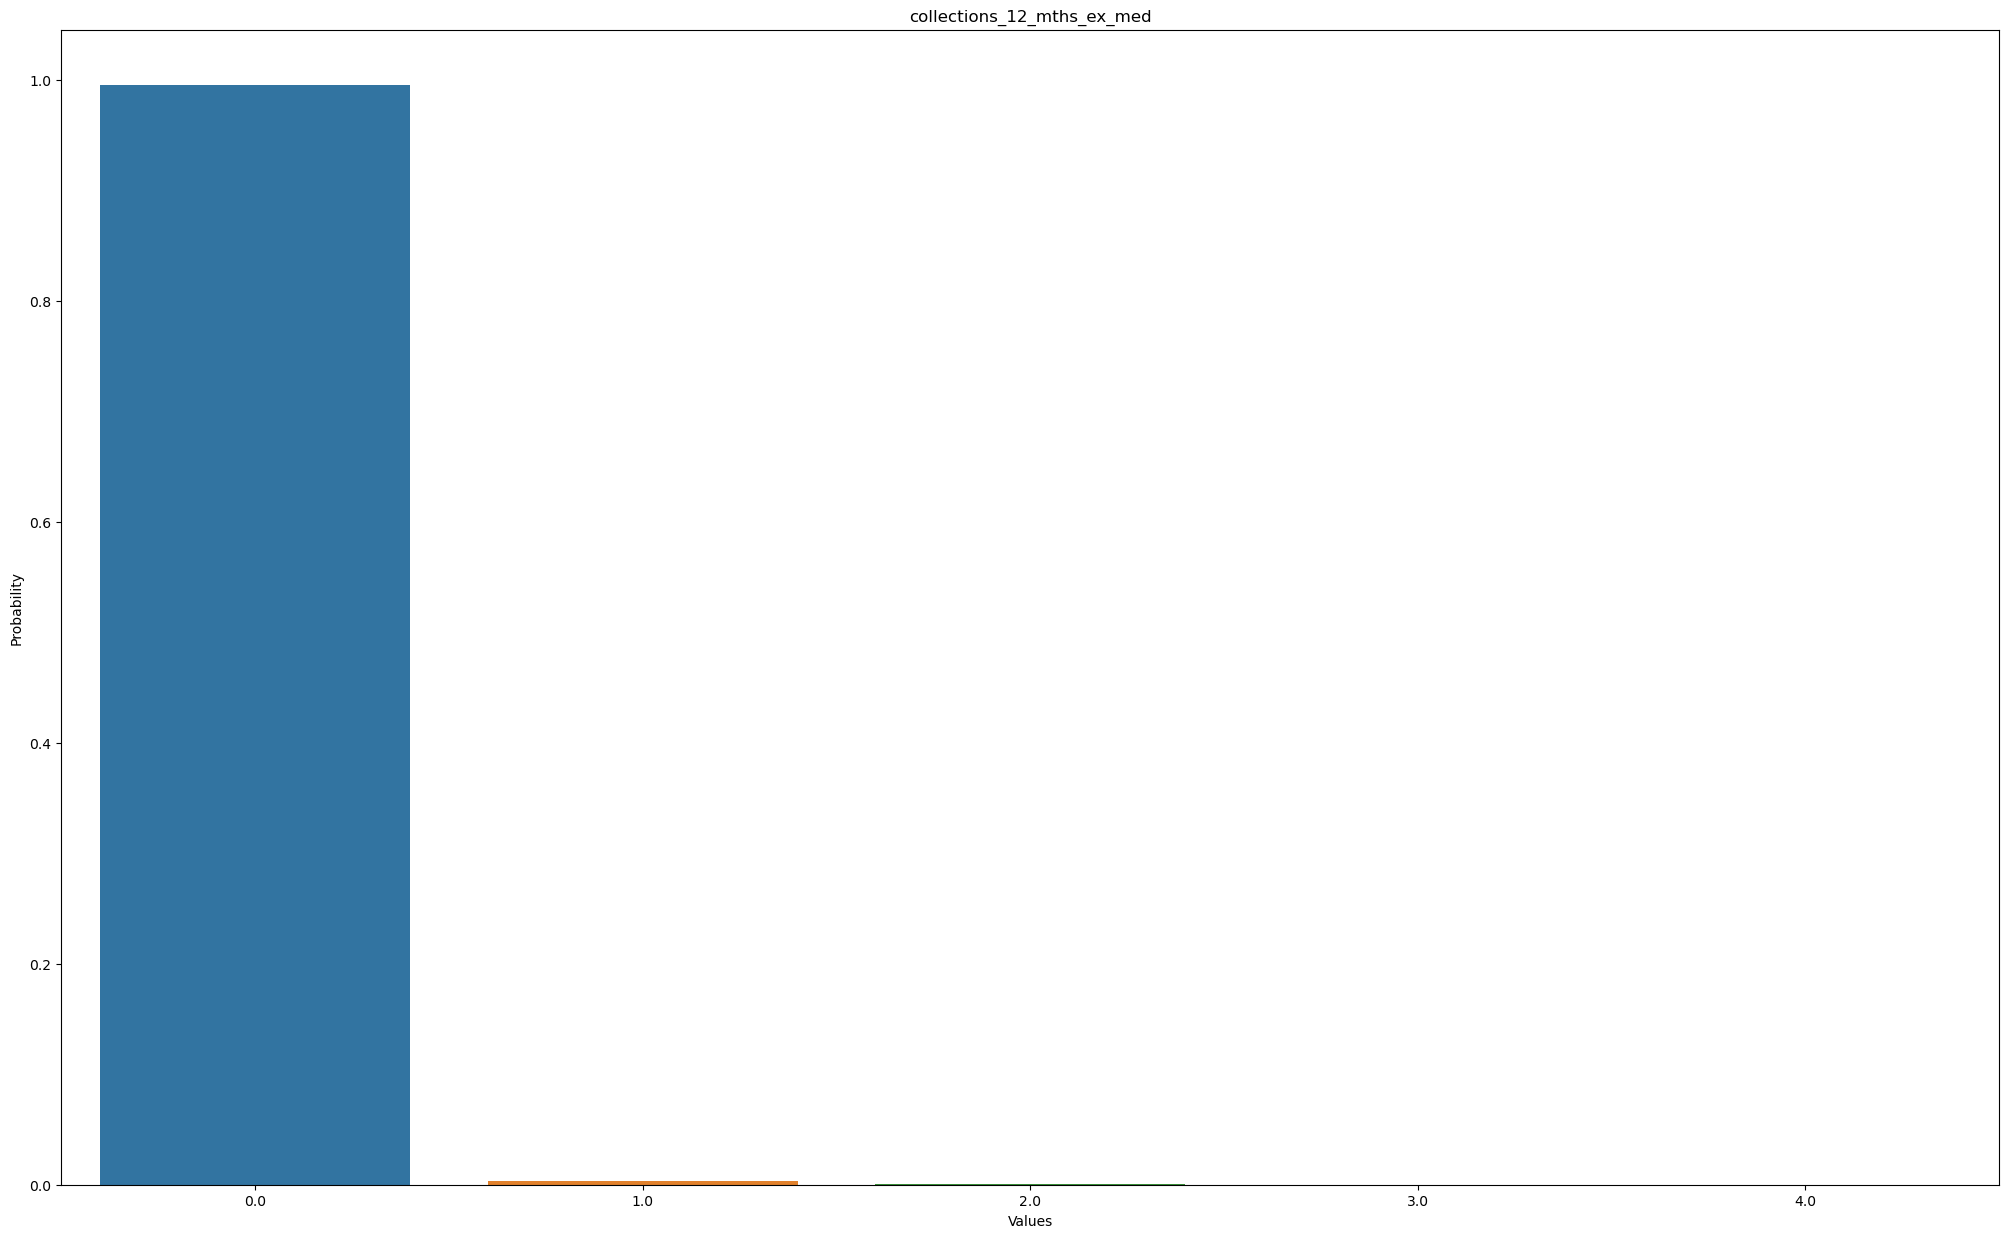

In [368]:
data_plot.plot_prob_distribution(df, "collections_12_mths_ex_med")

Looking at this probability distribution, we will fill the missing rows with 0. 

In [369]:
df = dataframe_transform.fill_null_values_with_most_frequent_value(df, "collections_12_mths_ex_med")

In [370]:
df.shape

(49392, 39)

## Check for skewness

### Numerical columns

Let's list all the numeric column again 

In [371]:
df.skew(numeric_only=True)


id                             2.362128
member_id                      2.198504
loan_amount                    0.803140
funded_amount                  0.868848
funded_amount_inv              0.812875
term_in_months                 1.005769
int_rate                       0.454911
instalment                     0.994417
employment_length             -0.187557
annual_inc                     8.553904
dti                            0.191423
delinq_2yrs                    5.344740
inq_last_6mths                 3.014551
open_accounts                  1.055242
total_accounts                 0.774619
out_prncp                      2.356451
out_prncp_inv                  2.356860
total_payment                  1.272202
total_payment_inv              1.261628
total_rec_prncp                1.262142
total_rec_int                  2.205425
total_rec_late_fee            13.504201
recoveries                    14.234821
collection_recovery_fee       27.851987
last_payment_amount            2.489630


In [372]:
df_copy = df.copy()

In [373]:
#for column in dataframe_info.list_all_numeric_columns(df_copy):
#    if column not in ["id", "member_id", "policy_code"]:
#        if df_copy[column].skew() > 1.0 or df_copy[column].skew() < -1.0:
#            print(f"column {column} has skew of {df_copy[column].skew()}")
#            df_copy = dataframe_transform.get_log_transform(df_copy, column)   
#            print(f"column {column} has skew of {df_copy[column].skew()}") 


In [374]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.0    49198
1.0      179
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [375]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.0    49198
1.0      179
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [376]:
df_copy_filtered = df_copy.loc[df_copy["collections_12_mths_ex_med"] == 0]

In [377]:
df_copy_filtered.shape


(49198, 39)

<AxesSubplot:>

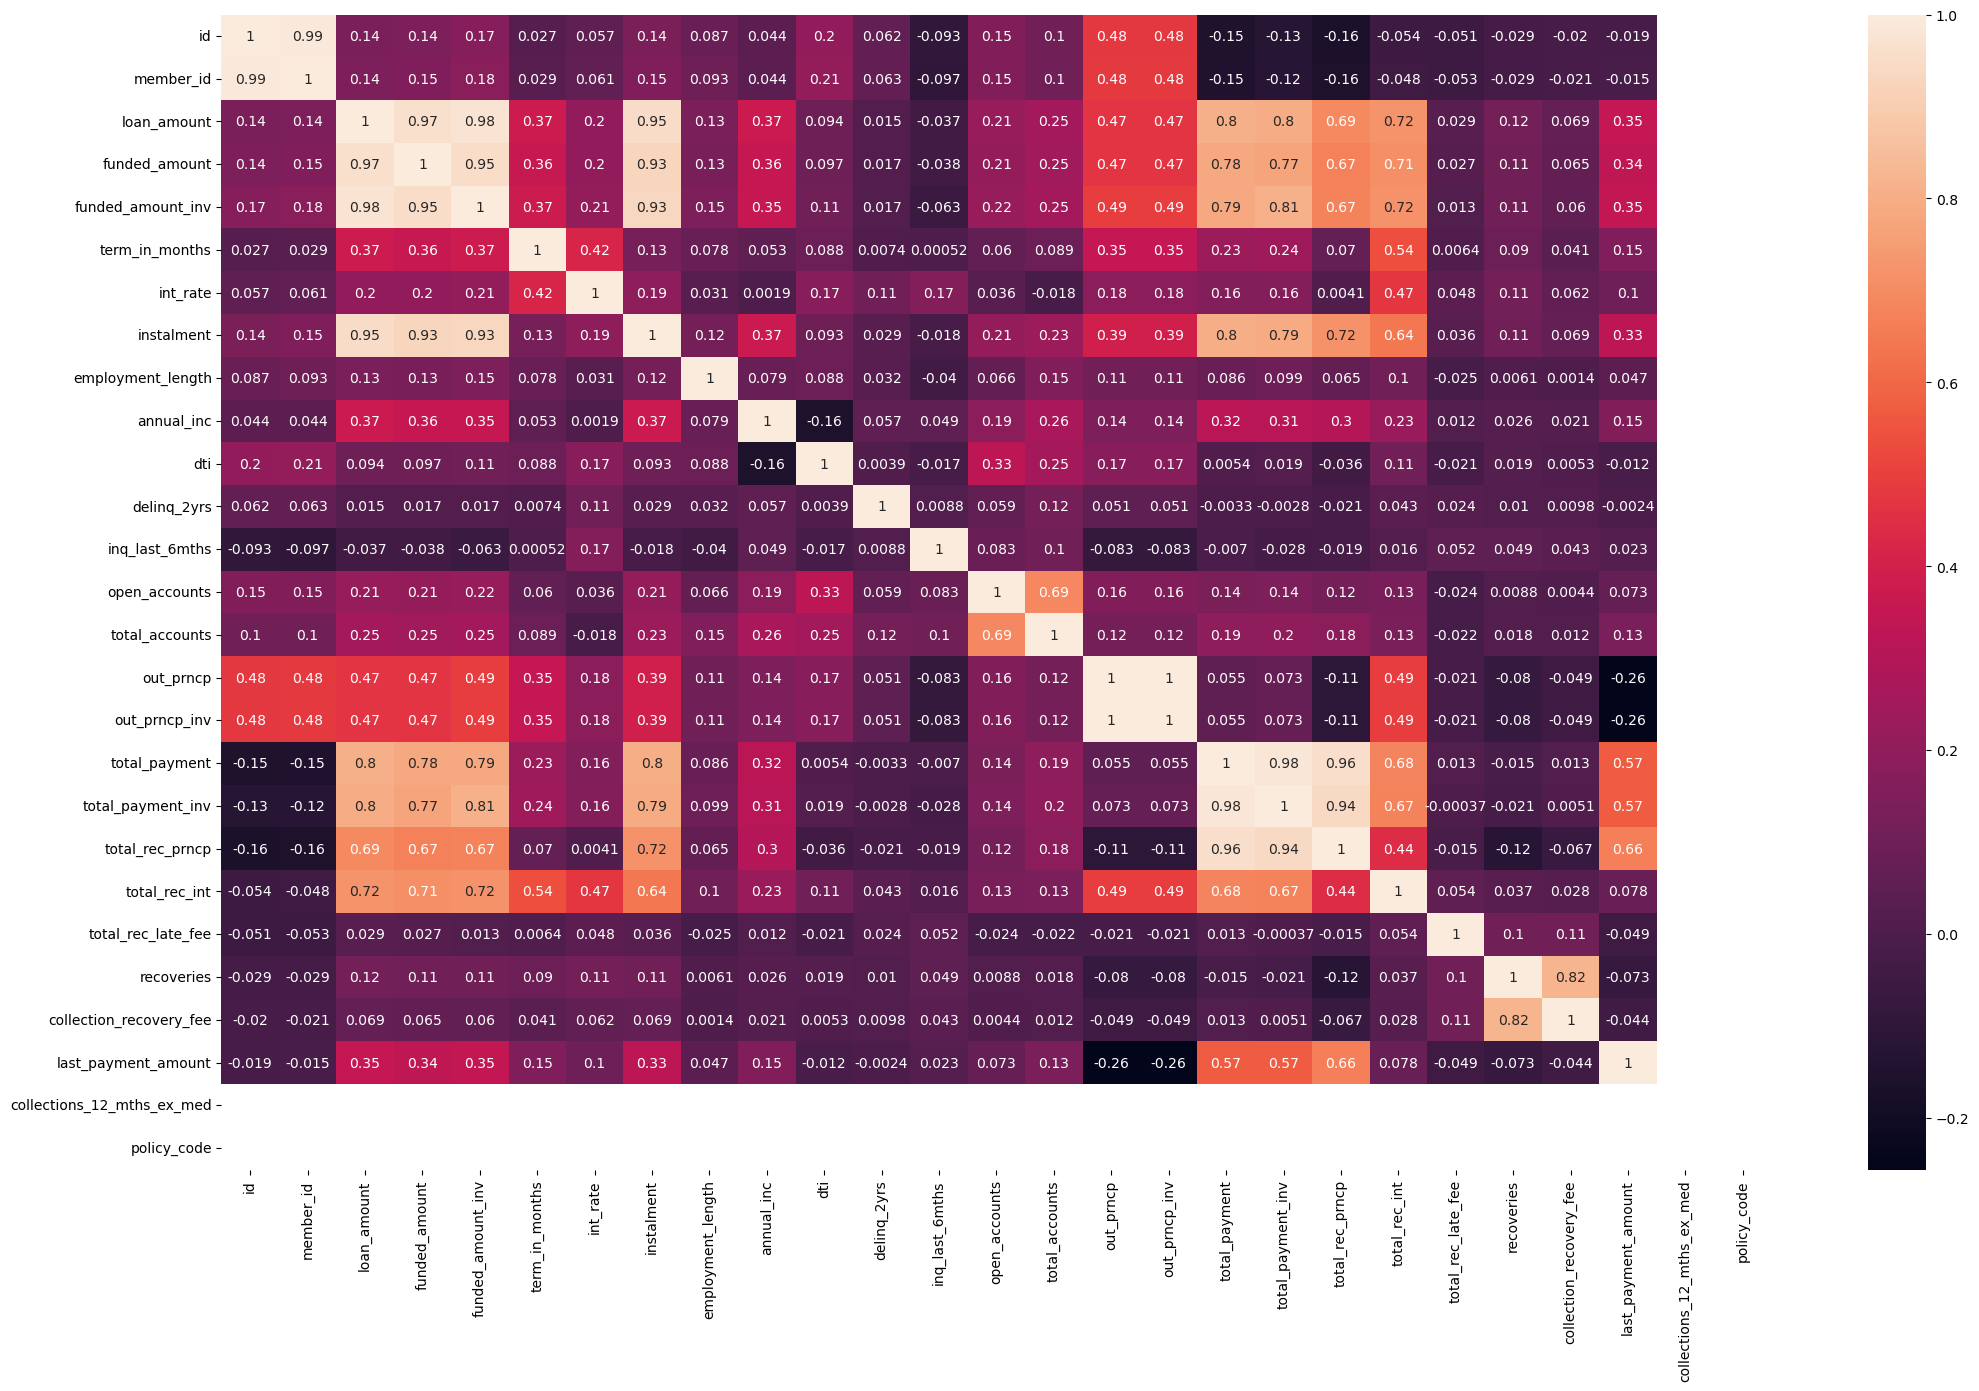

In [378]:
corr_matrix = df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)].corr()
sns.heatmap(corr_matrix, annot=True)

From this we can see columns "out_prncp" and "out_prncp_inv" and "funded_amonut" and "funded_amount_inv" are highly correlated (value over 0.9). We will  drop "collections_12_mths_ex_med" since that column does not look like have any effect on the outcome. We also can delete one of the columns between "id" and "memner_id" but we will do that later depending on which one we would be using.

In [379]:
df_copy_filtered.drop(columns=["collections_12_mths_ex_med", "out_prncp_inv", "funded_amount_inv"], inplace=True)

In [380]:
df_copy_filtered.shape

(49198, 36)

## Handling of outliers


### Categorical columns

In [381]:
list_of_categorical_columns = dataframe_info.list_all_categorical_columns(df_copy_filtered)
list_of_categorical_columns

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'application_type']

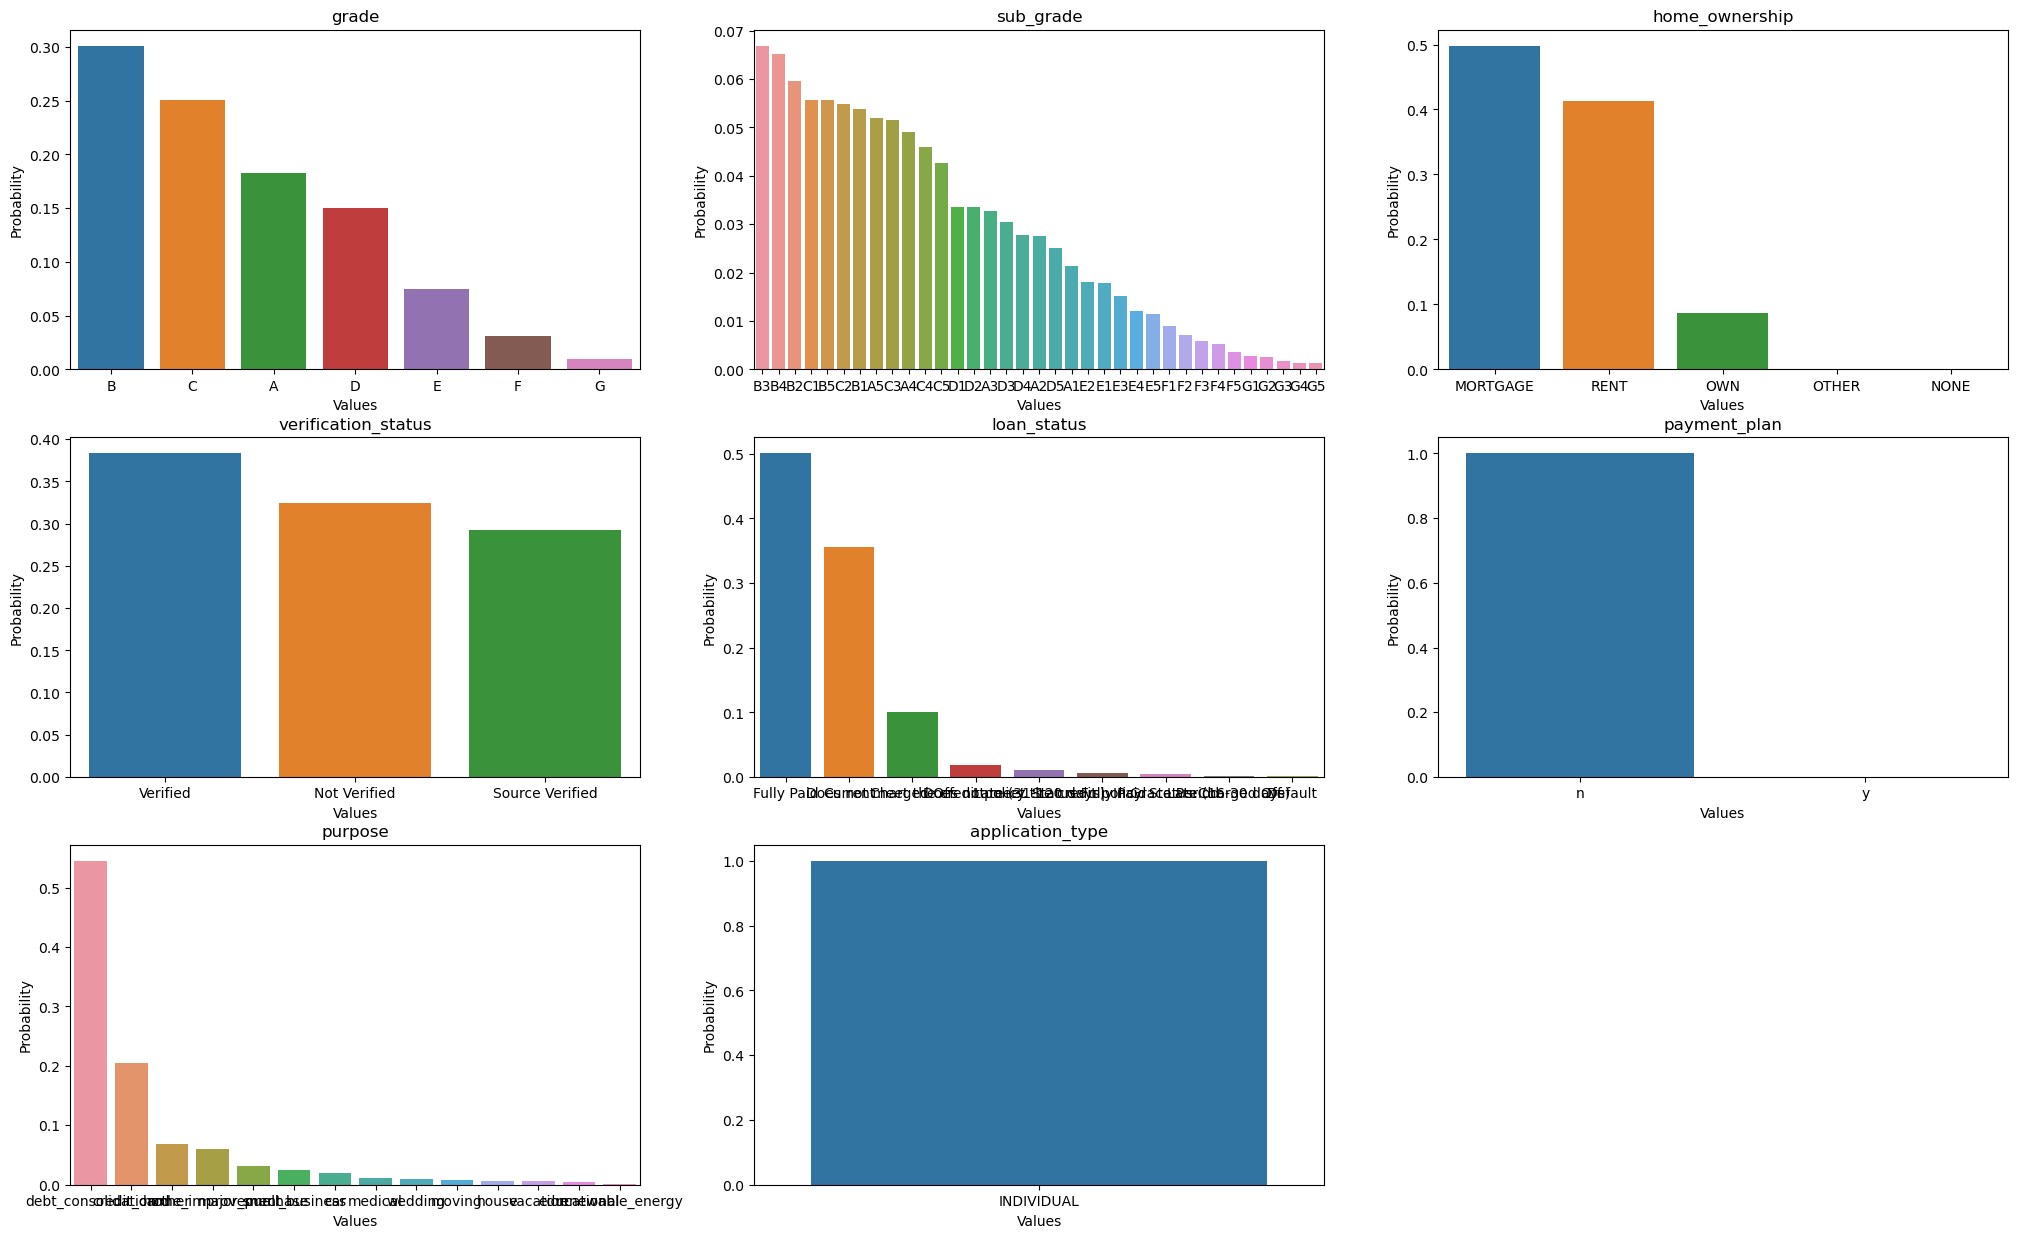

In [382]:
for i, column in enumerate(df_copy_filtered[list_of_categorical_columns], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(3,3,i)
    data_plot.plot_prob_distribution(df_copy_filtered, column)


The categorical column looks fine. We will leave these columsn for now as it is. 

### Numerical columns

In [383]:
print(len(dataframe_info.list_all_numeric_columns(df_copy_filtered)))

24


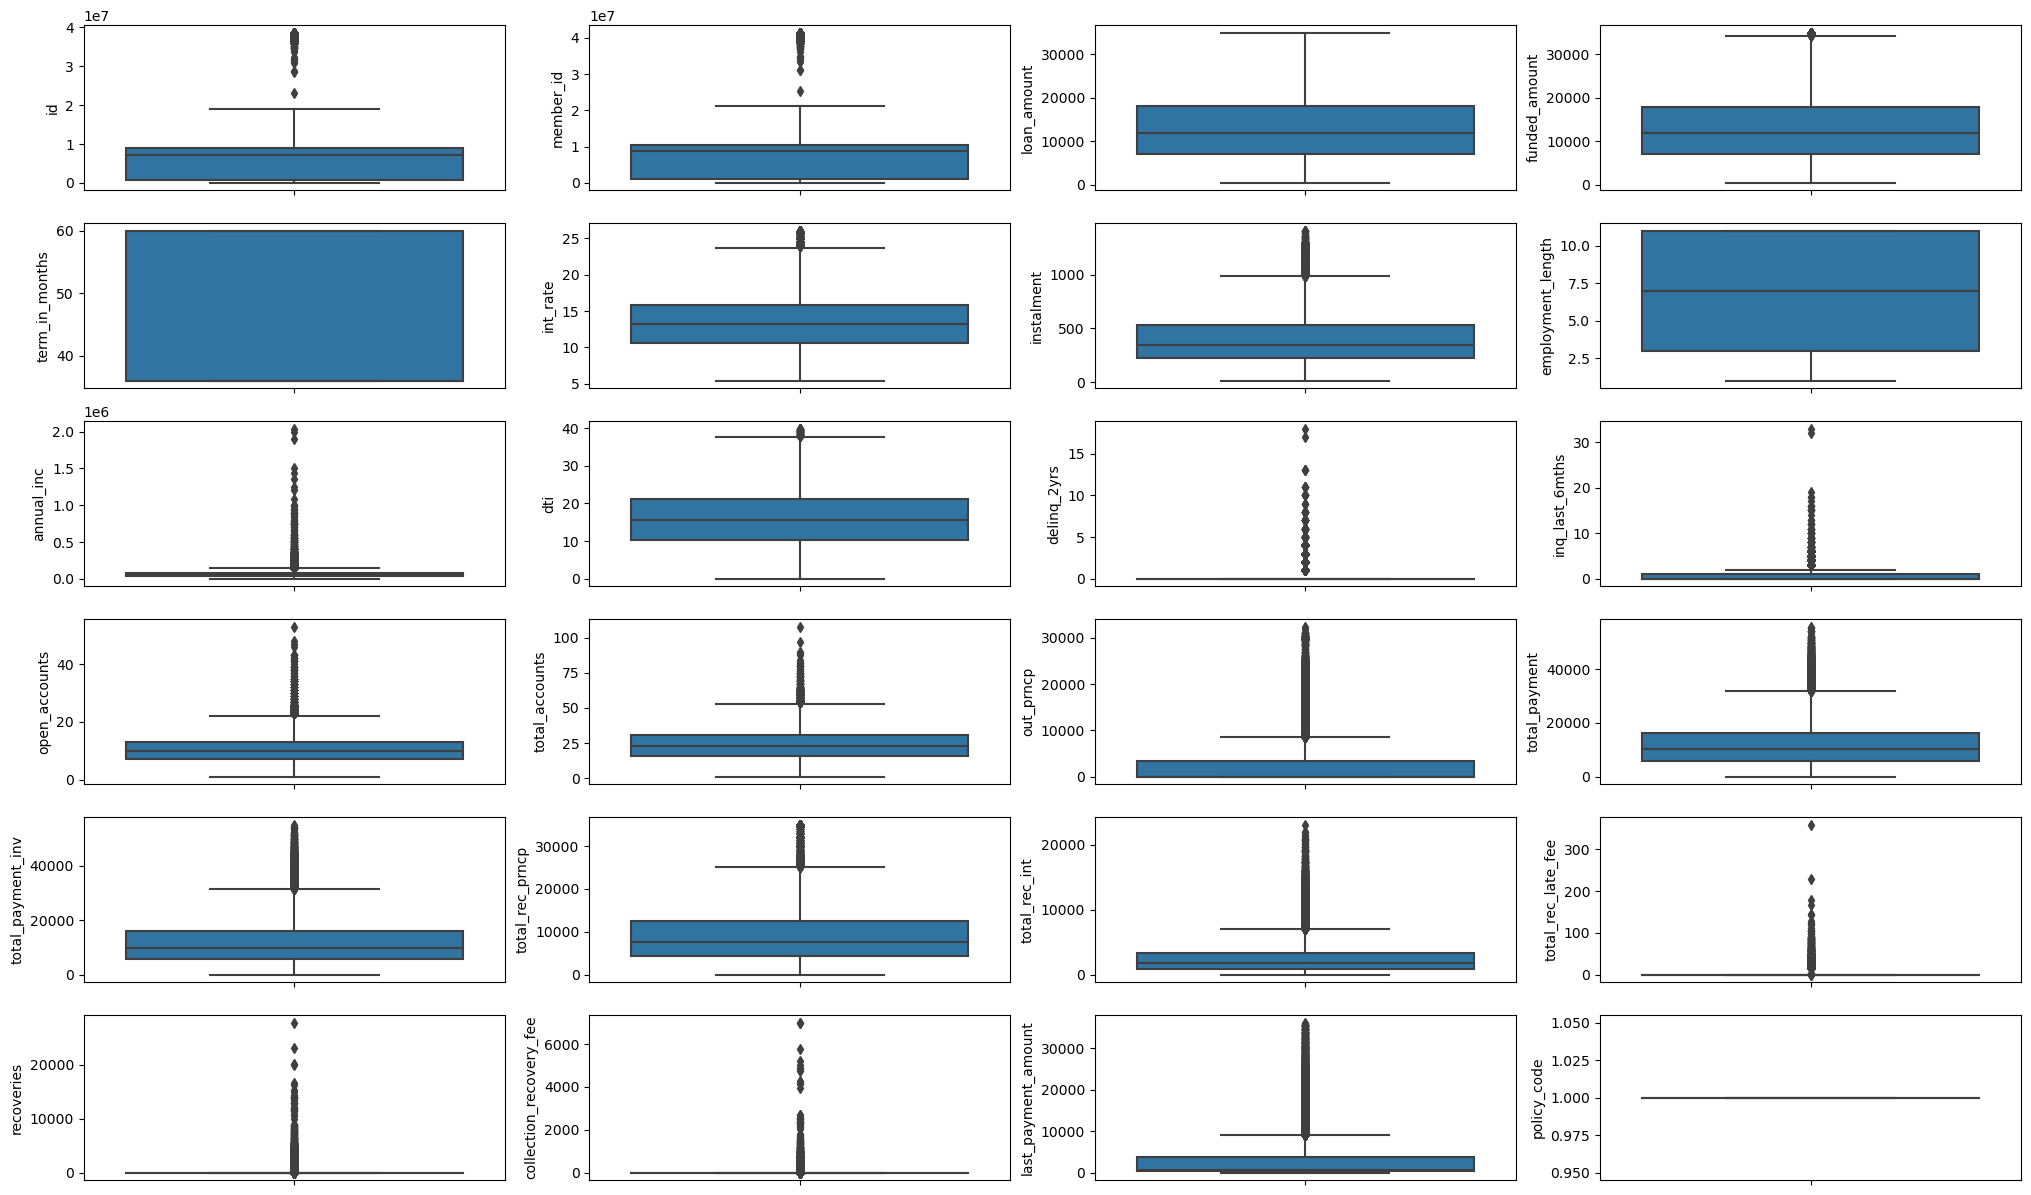

In [384]:
for i, column in enumerate(df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(6,4,i)
    sns.boxplot(data = df_copy_filtered, y = column)


There are some negative values in columns "total_rec_late_fee", "total_payment_inv", "recoveries", "collection_recovery_fee" and "last_payment_account". This is not possible and clearly a mistake so we will remove those values from these columns. 

In [385]:
for column in ["total_rec_late_fee", "total_payment_inv", "recoveries", "collection_recovery_fee", "last_payment_amount"]:

    df_copy_filtered = df_copy_filtered.loc[df_copy_filtered[column] >= 0]

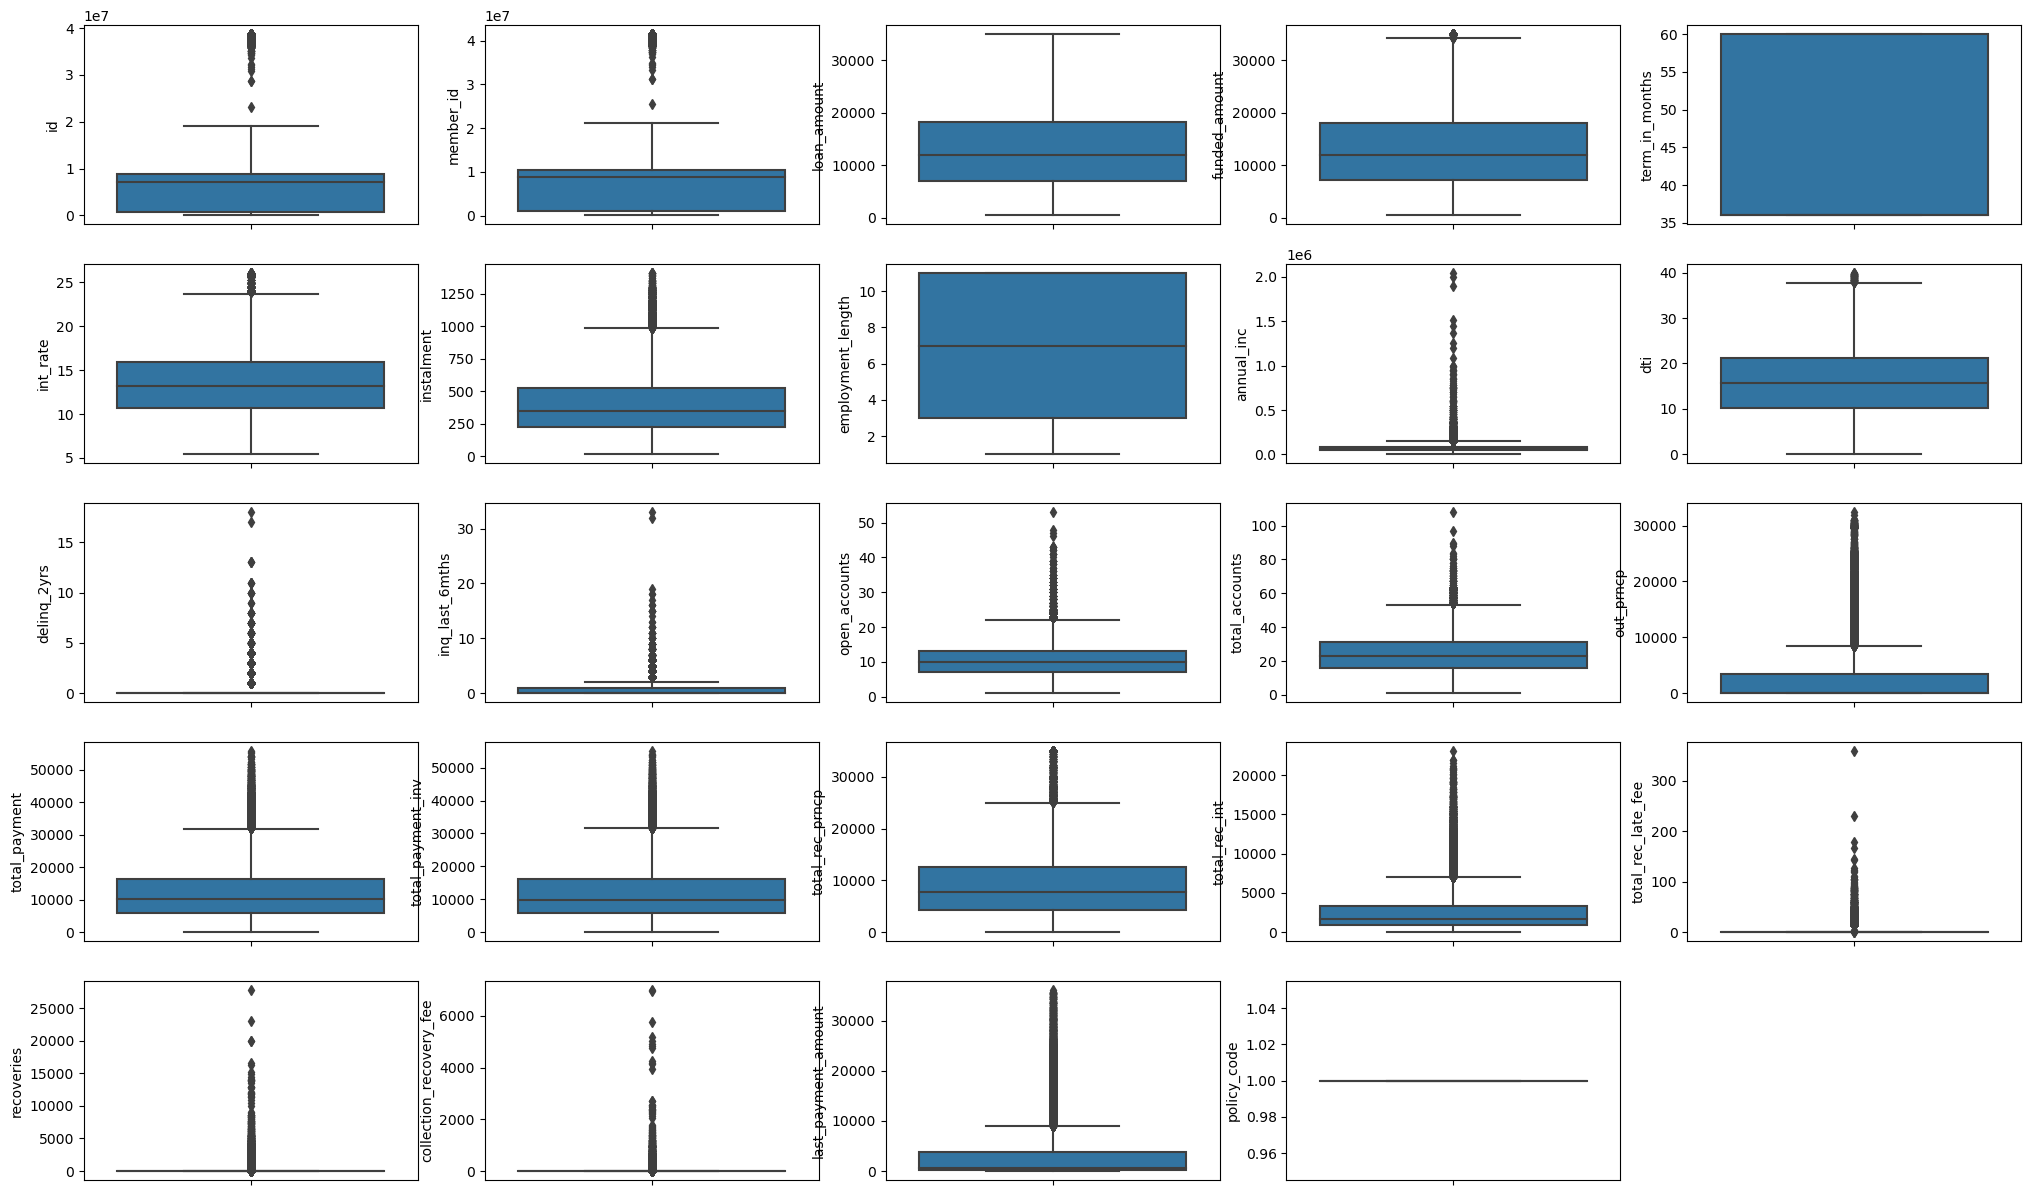

In [386]:
for i, column in enumerate(df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(5,5,i)
    sns.boxplot(data = df_copy_filtered, y = column)


In [387]:

#for column in ["int_rate", "dti", "open_accounts", "last_payment_amount"]:
#    
#    Q1 = df_copy_filterd[column].quantile(0.25)
#    Q3 = df_copy_filterd[column].quantile(0.75)
#    IQR = Q3 - Q1    #IQR is interquartile range. #

#    filter = df_copy_filterd[(df_copy_filterd[column] < Q1 - 1.5 * IQR)  | (df_copy_filterd[column] > Q3 + 1.5 *IQR)]
#    df_copy_filterd =  df_copy_filterd.drop(filter.index)

In [388]:
for column in ["int_rate", "dti", "open_accounts", "last_payment_amount"]:
    outliers = dataframe_info.calculate_iqr_outliers(df_copy_filtered, column)
    df_copy_filtered =  df_copy_filtered.drop(outliers.index)


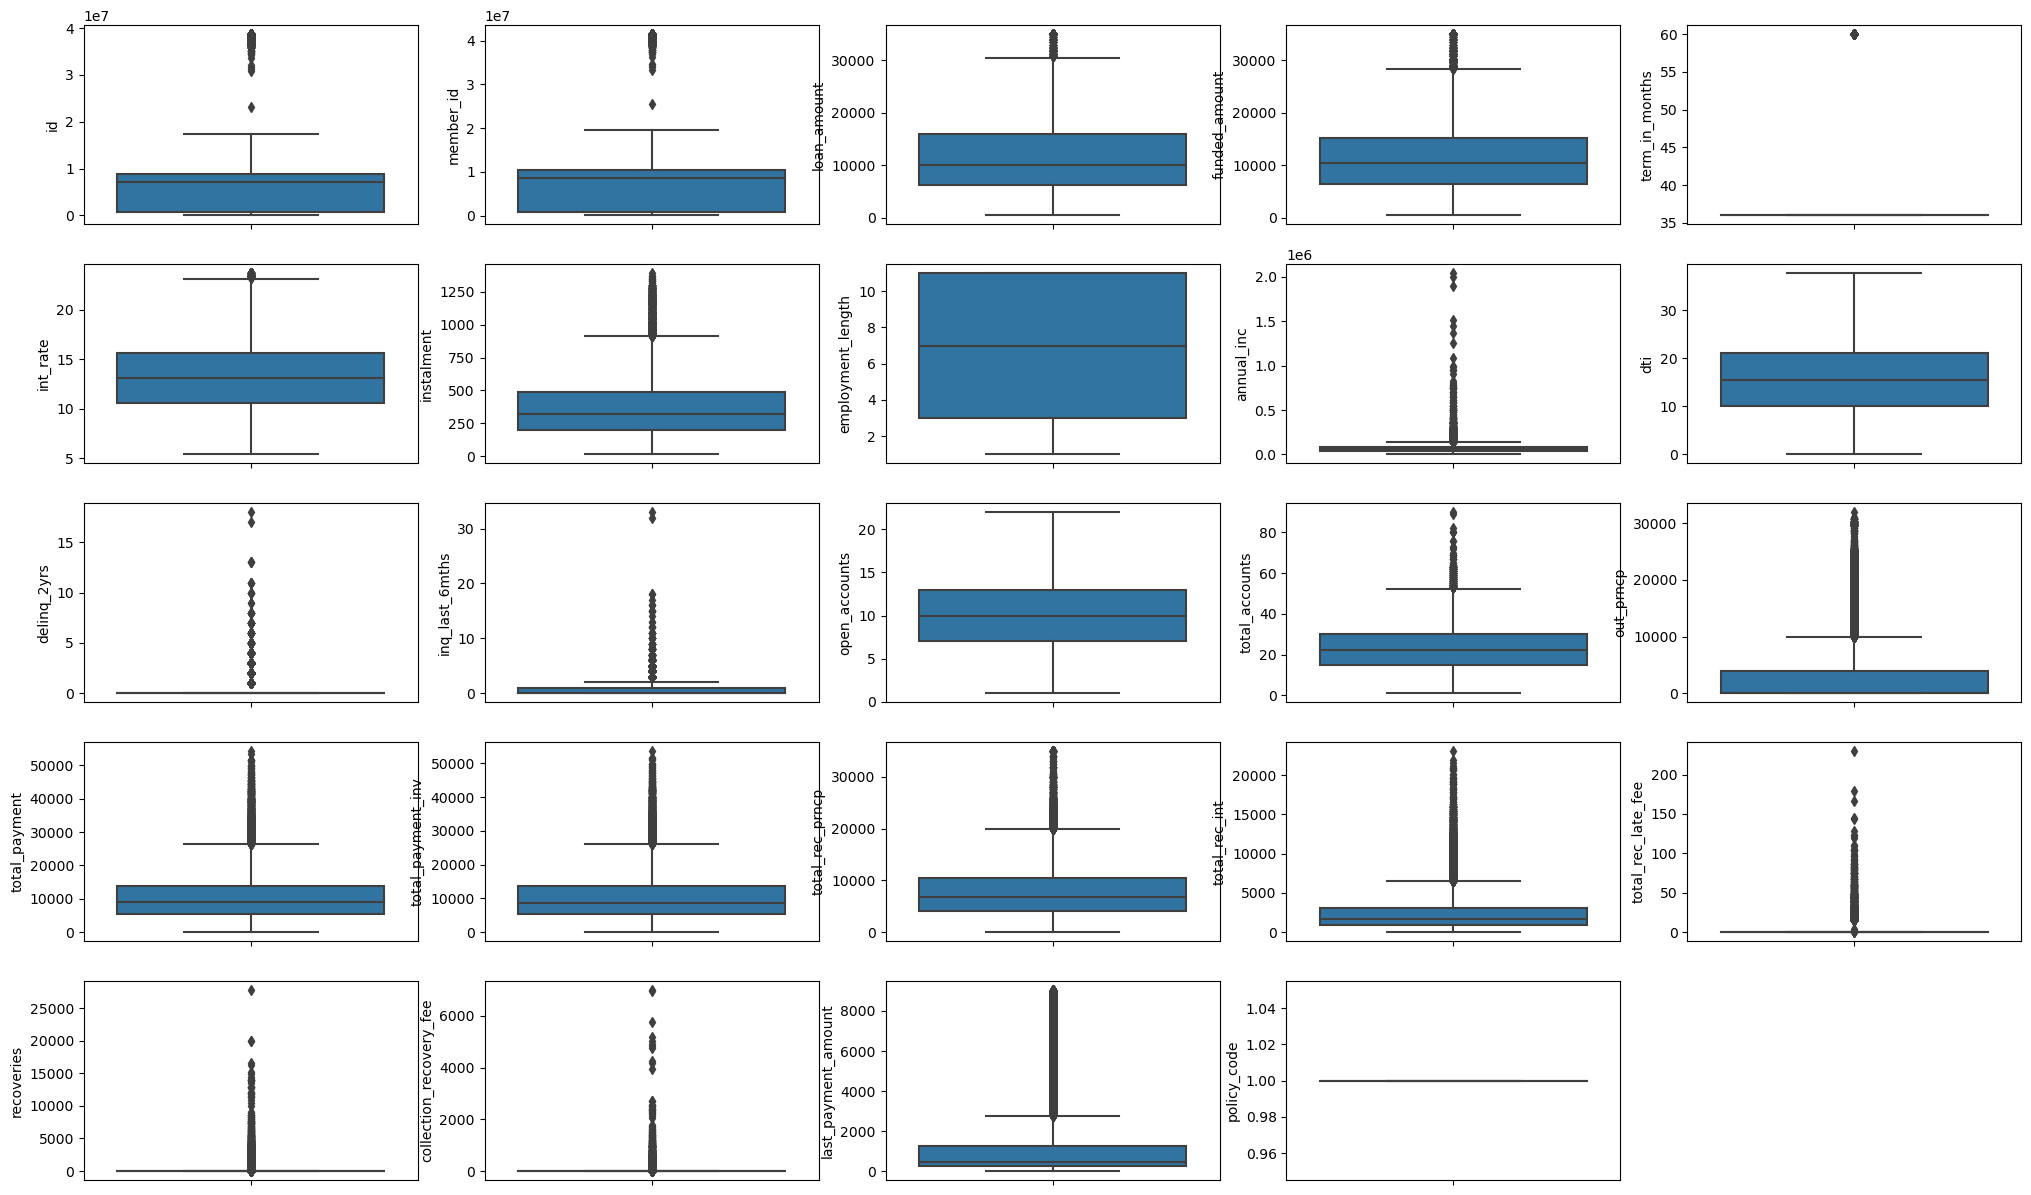

In [389]:
for i, column in enumerate(df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(5,5,i)
    sns.boxplot(data = df_copy_filtered, y = column)

## Data analysis and visualisation

Let's have a look at the data again 

In [390]:
df_copy_filtered.head(10)

,id,member_id,loan_amount,funded_amount,term_in_months,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,policy_code,application_type
0,38676116,41461848,8000,8000.0,36,7.49,248.82,A,A4,6,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,36,6.99,407.52,A,A3,10,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,36,11.44,83.20,B,B4,1,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,60,12.99,227.48,C,C2,1,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,1,INDIVIDUAL
9,38656052,41439857,10000,12000.0,36,8.19,314.25,A,A5,11,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,1,INDIVIDUAL
10,38656023,41439828,7200,7200.0,36,8.19,226.26,A,A5,8,OWN,87000.0,Not Verified,2021-01-01,Current,n,home_improvement,14.41,0,1996-03-01,0,12,35,4992.93,2711.84,2711.84,2207.07,504.77,0.0,0.0,0.0,2022-01-01,226.26,2022-01-01,1,INDIVIDUAL
11,38656004,41439809,2000,2000.0,36,10.49,65.00,B,B3,11,RENT,71000.0,Not Verified,2021-01-01,Current,n,debt_consolidation,25.54,0,1999-01-01,0,11,19,1401.57,778.83,778.83,598.43,180.40,0.0,0.0,0.0,2022-01-01,65.00,2022-01-01,1,INDIVIDUAL
12,38656003,41439808,6000,6000.0,36,12.39,200.41,C,C1,1,MORTGAGE,102000.0,Verified,2021-01-01,Current,n,debt_consolidation,20.20,3,2003-04-01,1,9,51,4240.81,2402.45,2402.45,1759.19,643.26,0.0,0.0,0.0,2022-01-01,200.41,2022-01-01,1,INDIVIDUAL
14,38655931,41439735,7675,7675.0,36,13.66,261.05,C,C3,11,OWN,22000.0,Verified,2021-01-01,Current,n,debt_consolidation,20.57,0,1981-10-01,0,12,26,5455.24,3126.78,3126.78,2219.76,907.02,0.0,0.0,0.0,2022-01-01,261.05,2022-01-01,1,INDIVIDUAL
15,38655925,41439729,12000,12000.0,36,13.16,377.09,A,A5,11,MORTGAGE,47256.0,Verified,2021-01-01,Current,n,debt_consolidation,32.15,0,1995-11-01,0,11,21,8321.68,4519.62,4519.62,3678.32,841.30,0.0,0.0,0.0,2022-01-01,377.09,2022-01-01,1,INDIVIDUAL


### Task-1: Current state of the loans
Summarise what percentage of the loans are paid back compared to the total payment expected with interest, and get a prediction for 6months into the future. 

In [391]:
df_copy_filtered.shape

(41676, 36)

In [392]:
df_copy_filtered.columns

Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'term_in_months',
       'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_date',
       'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_credit_line', 'inq_last_6mths', 'open_accounts',
       'total_accounts', 'out_prncp', 'total_payment', 'total_payment_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'last_credit_pull_date', 'policy_code', 'application_type'],
      dtype='object')

We will create a function to calculate the total loan amount.

In [393]:
def total_loan_amaount(instalment: float, term: int)->  float:
    return round((instalment * term), 2)

Now we will create a column that will have the total loan amount that clients are supposed to pay (with interest)

In [394]:
df_copy_filtered["total_loan_amount"] = df_copy_filtered.apply(lambda x: total_loan_amaount(x["instalment"], int(x["term_in_months"])), axis=1)

We will create another column to capture how many months each loan completed from their issue date and last payment date.

In [395]:
df_copy_filtered["terms_completed"] =((df_copy_filtered["last_payment_date"] - df_copy_filtered["issue_date"]).dt.days / 30).astype(int)

Column terms remaining will have the information how many months are still remaining in each loan.

In [396]:
df_copy_filtered["terms_remaining"] = df_copy_filtered["term_in_months"] - df_copy_filtered["terms_completed"]

We will create another column where we will store for each loan what percentage of the loan has been paid.

In [431]:
df_copy_filtered["percentage_of_the_loan_paid_back"] =  round(((df_copy_filtered["total_payment"]/df_copy_filtered["total_loan_amount"]) * 100) , 2)

Let's have a look at few rows of teh data frame to check the columns we just created. 

In [446]:
df_copy_filtered.head(5)

,id,member_id,loan_amount,funded_amount,term_in_months,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,policy_code,application_type,total_loan_amount,terms_completed,terms_remaining,percentage_of_the_loan_paid_back,percentage_of_the_loan_
0,38676116,41461848,8000,8000.0,36,7.49,248.82,A,A4,6,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,1,INDIVIDUAL,8957.52,12,24,33.30,33.30
1,38656203,41440010,13200,13200.0,36,6.99,407.52,A,A3,10,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,1,INDIVIDUAL,14670.72,12,24,33.30,33.30
5,38656111,41439917,2525,2525.0,36,11.44,83.20,B,B4,1,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,1,INDIVIDUAL,2995.20,12,24,30.50,30.50
8,38656063,41439868,10000,10000.0,60,12.99,227.48,C,C2,1,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,1,INDIVIDUAL,13648.80,12,48,19.95,19.95
9,38656052,41439857,10000,12000.0,36,8.19,314.25,A,A5,11,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,1,INDIVIDUAL,11313.00,12,24,33.29,33.29


Next we plot what percentage of the loans have been paid back.

<AxesSubplot:xlabel='percentage_of_the_loan_paid_back', ylabel='Count'>

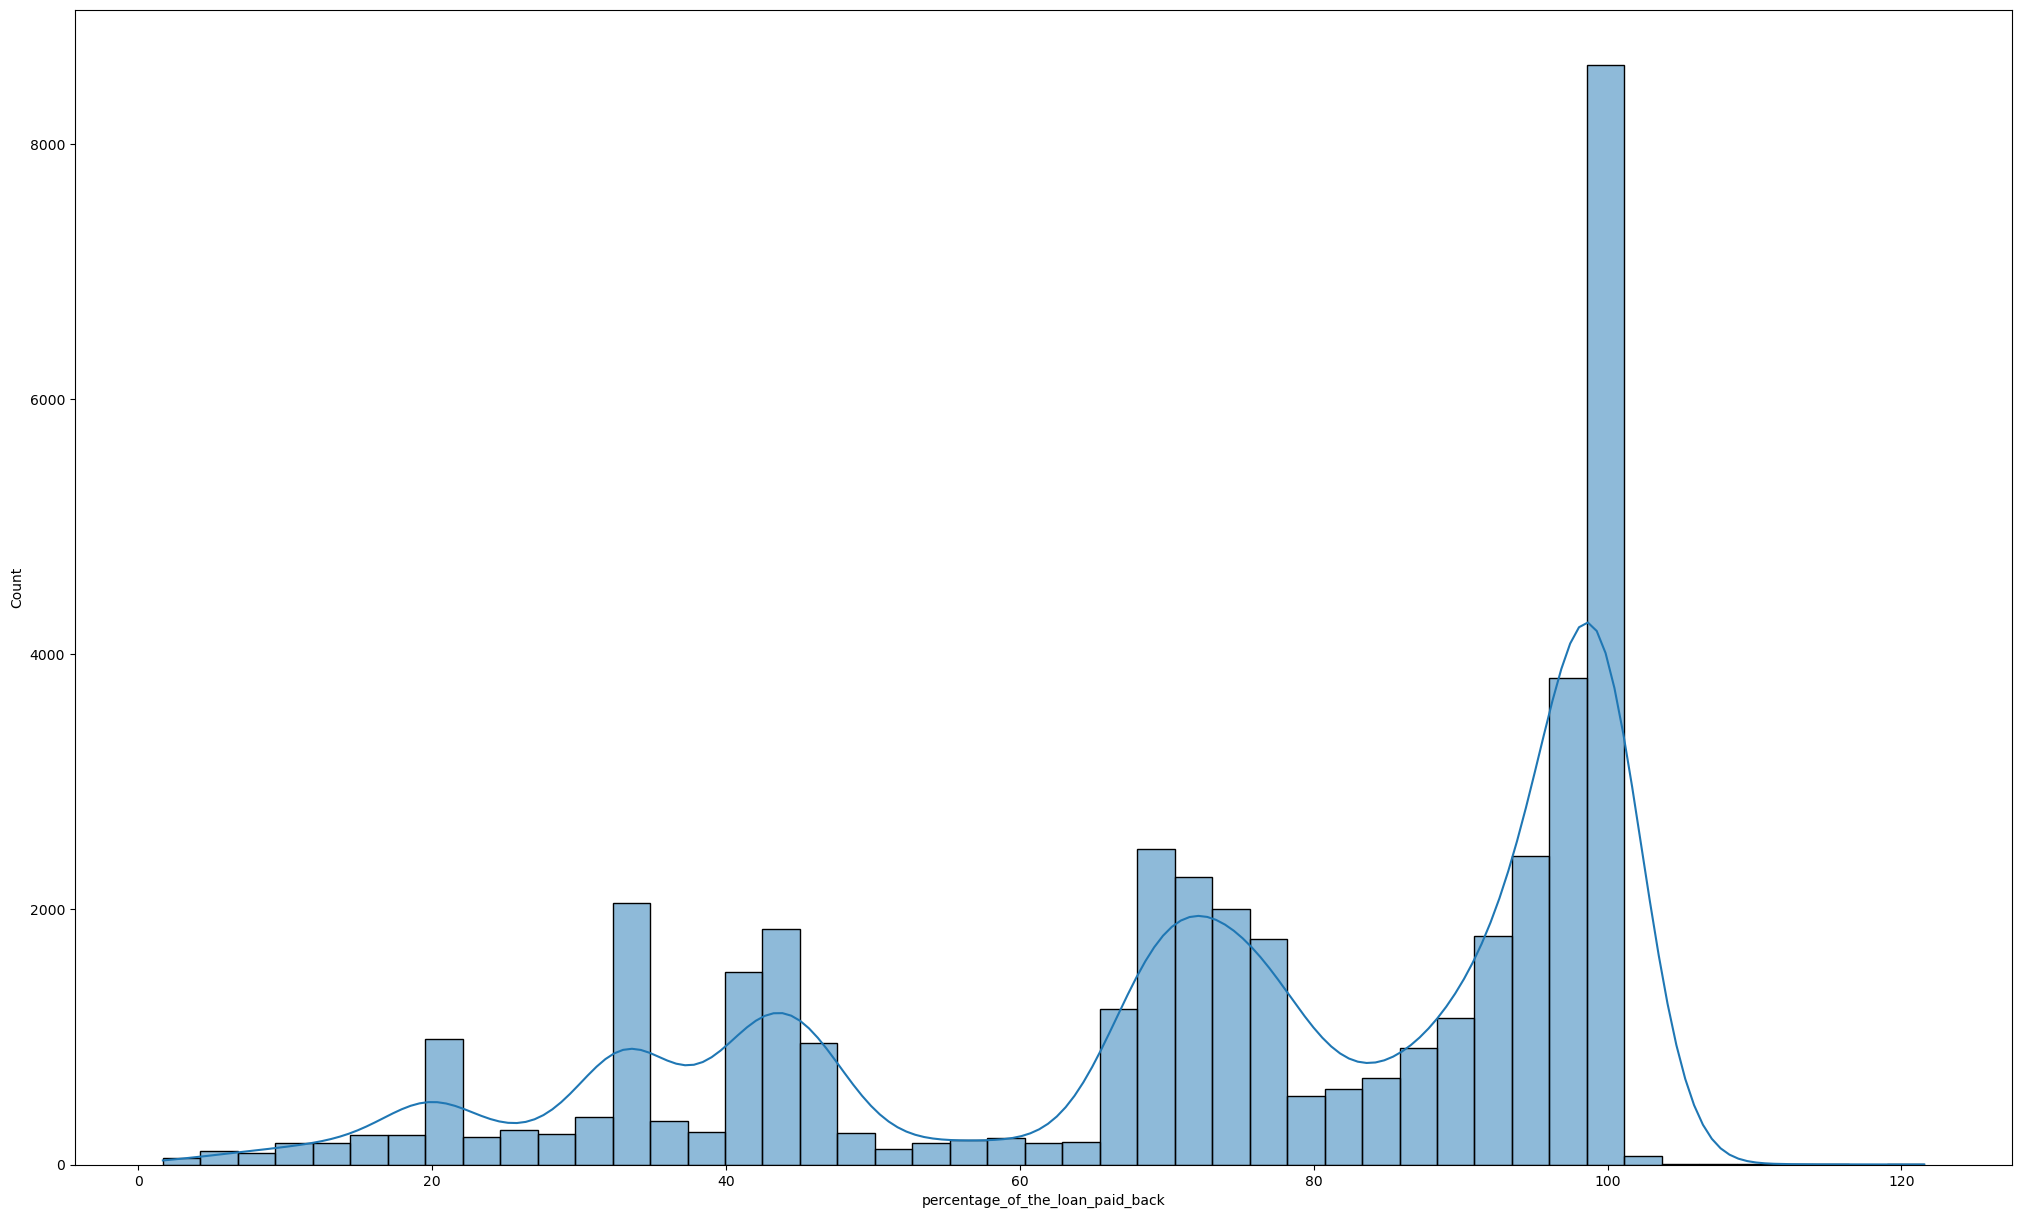

In [433]:
data_plot.plot_histogram(df_copy_filtered, "percentage_of_the_loan_paid_back")

From this we can see that most of the loans have been paid back in full.

Now we will create a new data frame with all the loans that are active i.e. where loan status is current.

In [434]:
current_df = df_copy_filtered.loc[df_copy_filtered["loan_status"] == "Current"] 

In [437]:
current_df["loan_status"].value_counts()

Current    16629
Name: loan_status, dtype: int64

To get 6 months projection we will create an extra column with 6 months added to cpleted terms.

In [438]:
current_df["term_completed_in_6_months"] = current_df["terms_completed"].apply(lambda x: x + 6)

In [439]:
current_df.head(1)

,id,member_id,loan_amount,funded_amount,term_in_months,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,policy_code,application_type,total_loan_amount,terms_completed,terms_remaining,percentage_of_the_loan_paid_back,percentage_of_the_loan_,term_completed_in_6_months
0,38676116,41461848,8000,8000.0,36,7.49,248.82,A,A4,6,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.7,2982.51,2982.51,2470.3,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,1,INDIVIDUAL,8957.52,12,24,33.3,33.3,18


In [440]:
current_df["amount_paid_in_6_months"] = current_df.apply(lambda x: total_loan_amaount(x["instalment"], int(x["term_completed_in_6_months"])), axis=1)   

In [443]:
current_df["percentage_of_the_loan_paid_back_in_6_months"] =  round(((current_df["amount_paid_in_6_months"]/current_df["total_loan_amount"]) * 100) , 2)

<AxesSubplot:xlabel='percentage_of_the_loan_paid_back_in_6_months', ylabel='Count'>

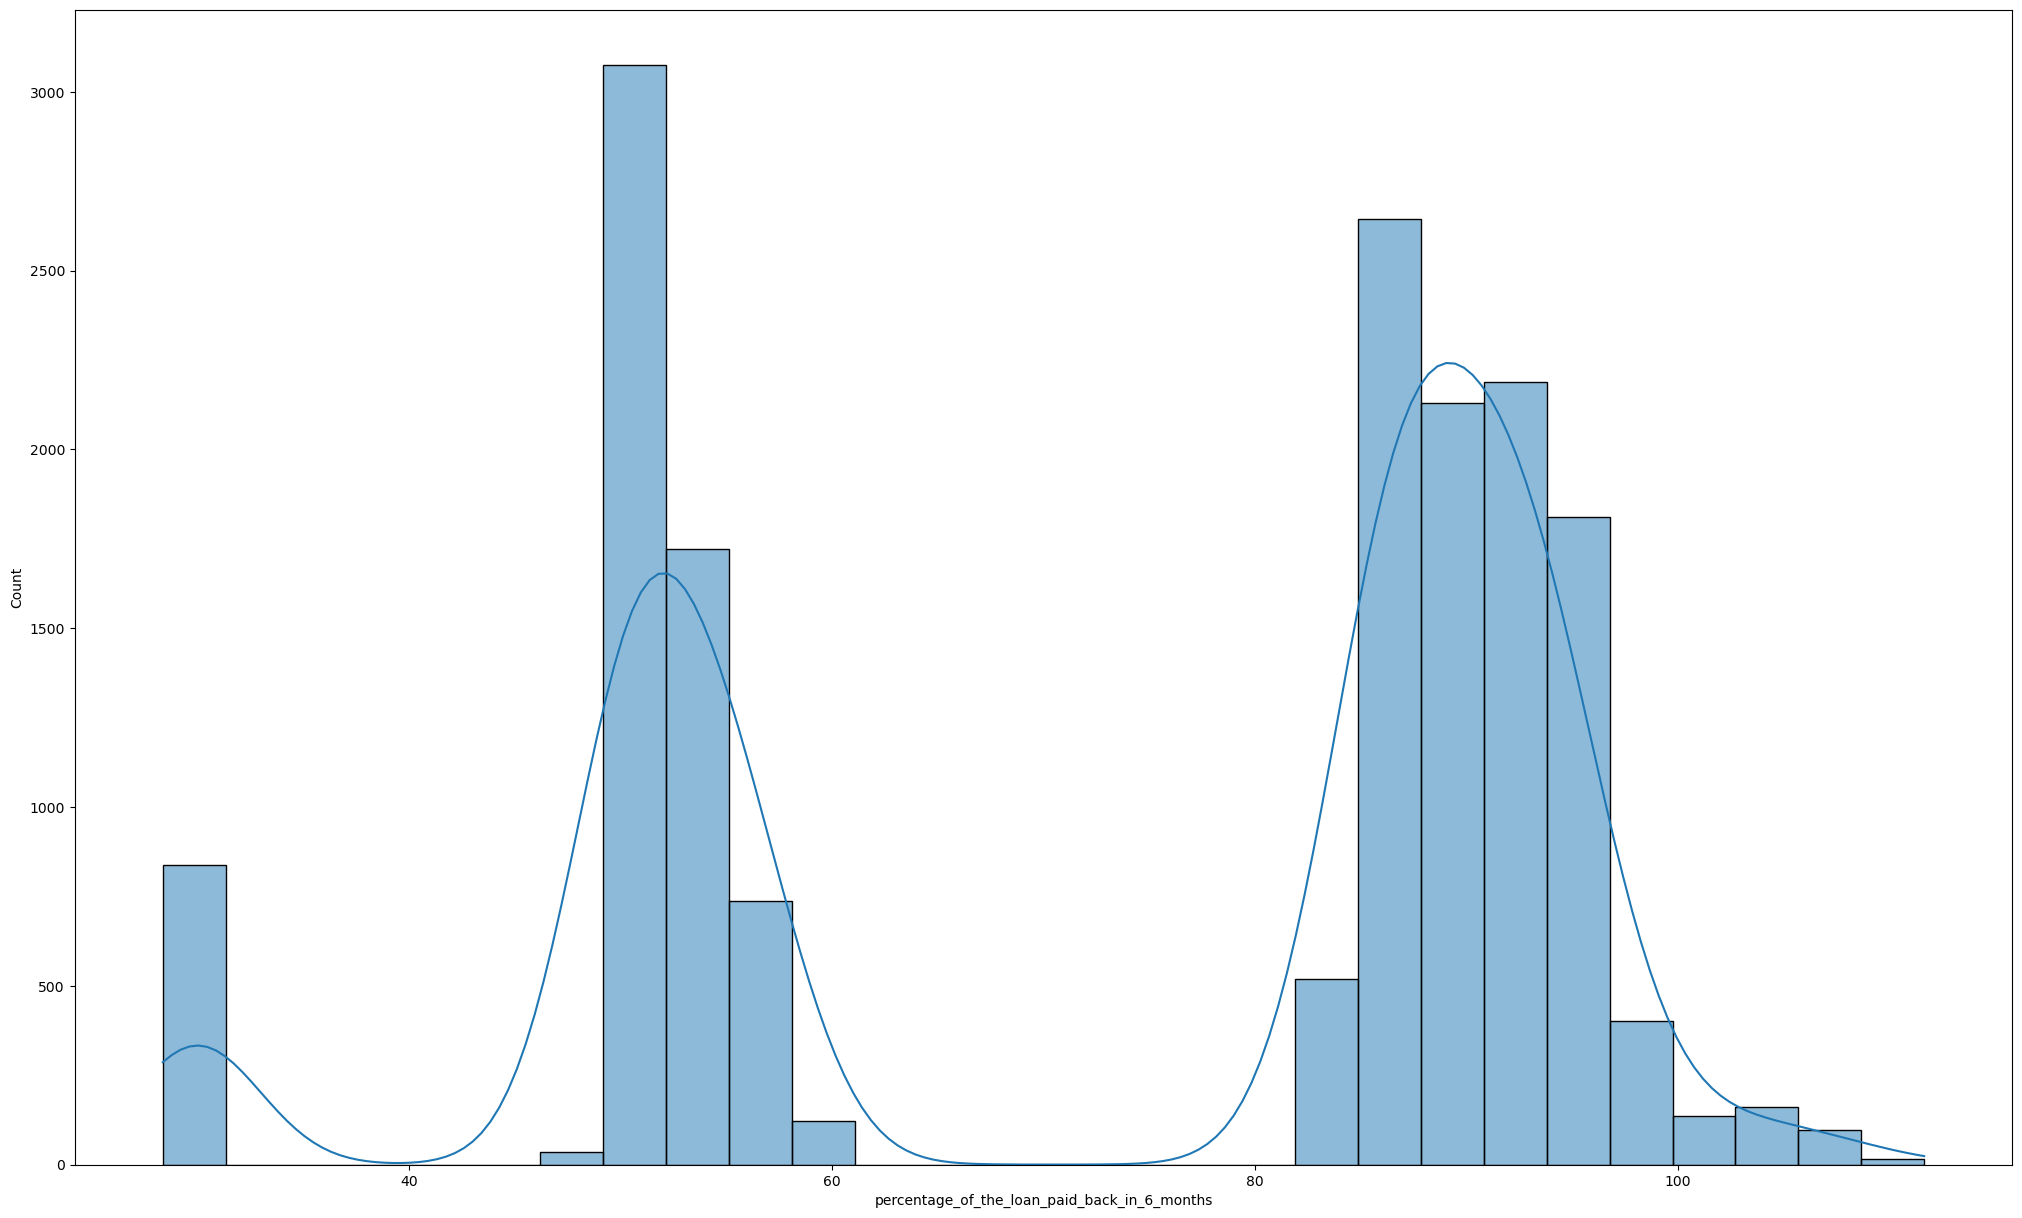

In [444]:
data_plot.plot_histogram(current_df, "percentage_of_the_loan_paid_back_in_6_months")

### Task 2: Calculating loss

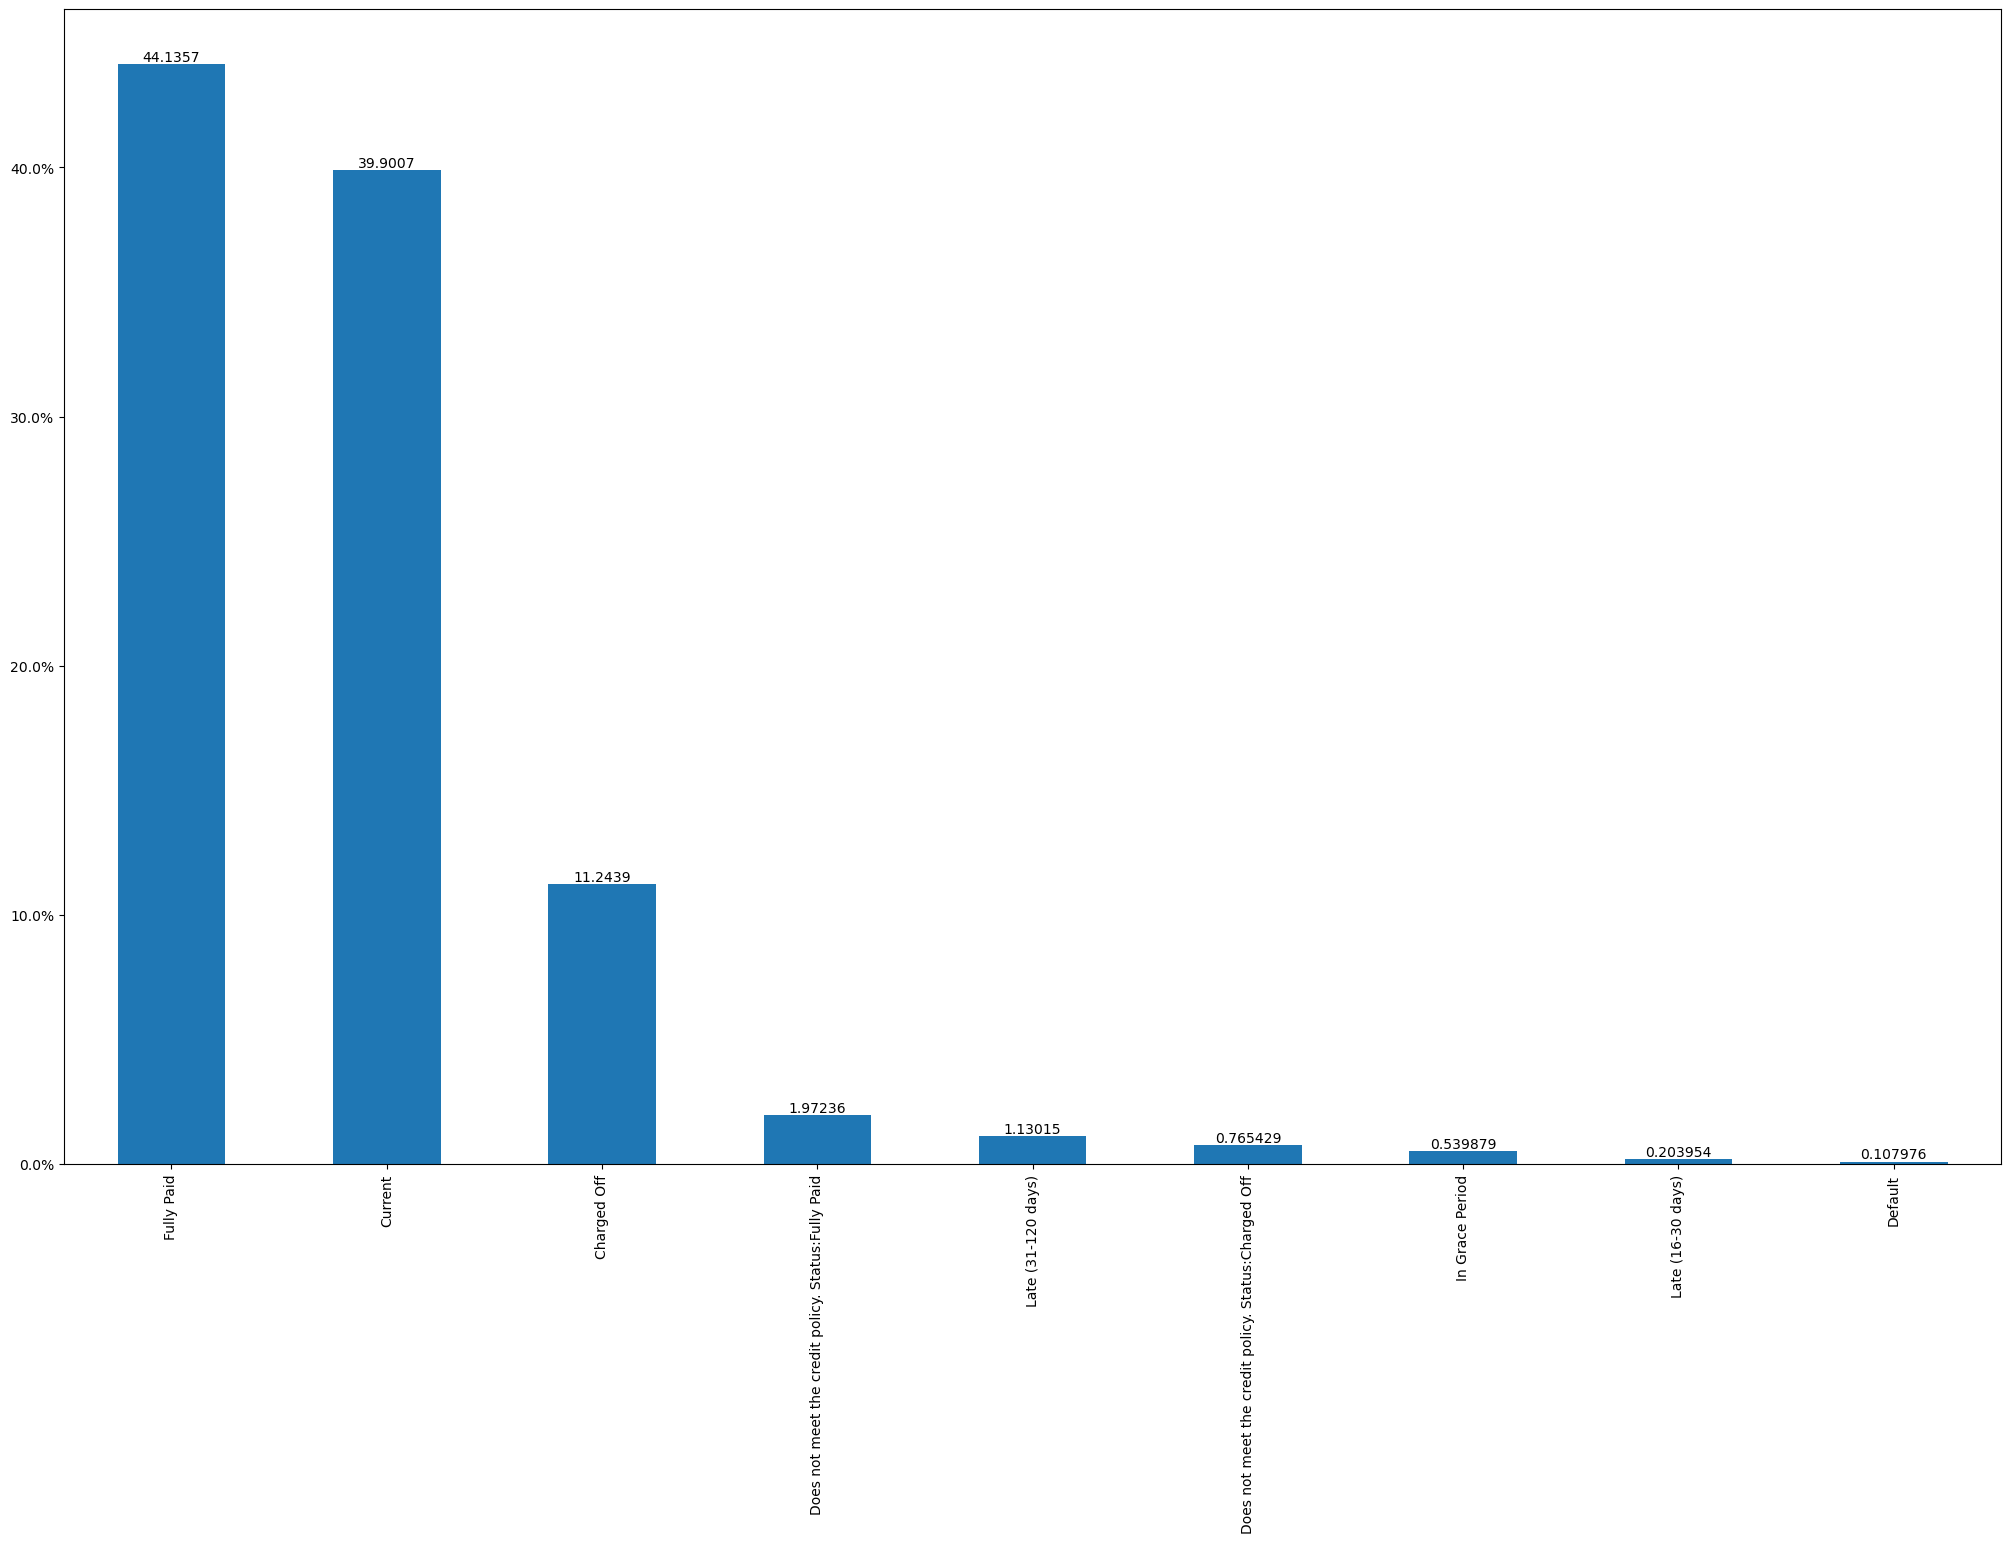

In [398]:
import matplotlib.ticker as mtick

ax = (df_copy_filtered['loan_status'].value_counts(normalize=True) * 100).plot(kind = 'bar')
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

~10% of loans have been charged off.

In [399]:
charged_off_df = df_copy_filtered.loc[df_copy_filtered['loan_status'] == "Charged Off"]

In [400]:
charged_off_df.shape

(4686, 39)

In [401]:
charged_off_df["terms_completed"] =((charged_off_df["last_payment_date"] - charged_off_df["issue_date"]).dt.days / 30).astype(int)

In [402]:
(charged_off_df["terms_completed"] < charged_off_df["term_in_months"].astype(int)).value_counts()

True     4664
False      22
dtype: int64

In [403]:
charged_off_df["terms_remaining"] = charged_off_df["term_in_months"].astype(int) - charged_off_df["terms_completed"]

In [404]:
charged_off_df[charged_off_df.terms_completed.gt(charged_off_df.term_in_months.astype(int))]

,id,member_id,loan_amount,funded_amount,term_in_months,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,policy_code,application_type,total_loan_amount,terms_completed,terms_remaining
39128,809076,1015859,21000,21000.0,36,13.16,767.55,E,E3,1,RENT,150000.0,Verified,2017-07-01,Charged Off,n,debt_consolidation,18.26,0,1987-01-01,0,7,23,0.0,26173.55,26142.48,18949.46,6870.10,74.590000,279.40,50.2920,2021-02-01,113.00,2021-04-01,1,INDIVIDUAL,27631.80,43,-7
44468,625236,801282,12000,12000.0,36,5.42,361.92,A,A1,11,MORTGAGE,35000.0,Not Verified,2016-12-01,Charged Off,n,credit_card,14.13,0,1989-03-01,1,10,12,0.0,12949.32,12889.43,11861.35,1039.58,34.907041,13.48,0.1348,2020-01-01,363.60,2020-06-01,1,INDIVIDUAL,13029.12,37,-1
44794,616548,790541,3000,3000.0,36,9.62,96.27,B,B3,5,RENT,50000.0,Not Verified,2016-11-01,Charged Off,n,small_business,19.92,1,2005-09-01,2,7,11,0.0,3419.56,3163.31,2947.95,471.61,0.000000,0.00,0.0000,2020-04-01,145.91,2022-01-01,1,INDIVIDUAL,3465.72,41,-5
47590,535233,691631,1000,1000.0,36,7.51,31.12,A,A4,11,RENT,48000.0,Not Verified,2016-06-01,Charged Off,n,vacation,15.47,0,2000-11-01,0,8,17,0.0,940.14,940.14,785.08,114.41,28.644174,12.01,2.1618,2019-07-01,3.24,2019-11-01,1,INDIVIDUAL,1120.32,37,-1
48420,511137,660174,10000,10000.0,36,11.36,329.12,B,B5,5,RENT,42000.0,Not Verified,2016-05-01,Charged Off,n,renewable_energy,10.31,0,2001-12-01,0,19,37,0.0,10951.82,10951.82,8662.96,2063.29,32.821667,192.75,34.6950,2019-11-01,284.15,2022-01-01,1,INDIVIDUAL,11848.32,42,-6
49605,480970,611595,13750,13750.0,36,12.73,461.54,C,C1,2,RENT,36000.0,Not Verified,2016-02-01,Charged Off,n,debt_consolidation,22.23,0,1996-10-01,0,5,33,0.0,15701.69,14143.30,8221.87,4278.79,0.000000,3201.03,548.1854,2020-05-01,100.00,2022-01-01,1,INDIVIDUAL,16615.44,51,-15
49907,475342,598977,14400,14400.0,36,12.87,484.32,C,C1,4,MORTGAGE,48000.0,Not Verified,2016-01-01,Charged Off,n,credit_card,5.42,0,1996-02-01,0,3,9,0.0,7265.93,7155.15,3298.31,3322.41,0.000000,645.21,6.0900,2019-09-01,36.01,2019-10-01,1,INDIVIDUAL,17435.52,44,-8
51047,441041,534700,10000,10000.0,36,13.57,339.69,C,C3,10,MORTGAGE,47000.0,Verified,2015-09-01,Charged Off,n,home_improvement,6.05,0,1998-01-01,1,4,6,0.0,10217.97,10118.46,7104.14,2932.27,16.938760,164.63,2.0800,2019-07-01,150.66,2019-10-01,1,INDIVIDUAL,12228.84,46,-10
51151,438224,527582,8000,8000.0,36,18.43,290.96,F,F2,4,RENT,38698.0,Not Verified,2015-09-01,Charged Off,n,wedding,9.86,0,2002-10-01,0,4,17,0.0,9628.86,9598.96,7058.84,2555.07,14.956180,0.00,0.0000,2018-10-01,290.96,2022-01-01,1,INDIVIDUAL,10474.56,37,-1
51277,434797,518223,18000,18000.0,36,12.18,599.40,B,B4,7,RENT,44000.0,Not Verified,2015-08-01,Charged Off,n,debt_consolidation,20.24,0,2001-10-01,2,6,18,0.0,24142.17,23185.27,11740.72,6411.93,0.000000,5989.52,950.8695,2019-11-01,382.64,2022-01-01,1,INDIVIDUAL,21578.40,51,-15


There are some charged off loans where last payment were made long after loan term finished.  

In [405]:
charged_off_df["amount_paid"] = charged_off_df["terms_completed"] * charged_off_df["instalment"]

In [406]:
charged_off_df["amount_remaining"] = charged_off_df["loan_amount"] - charged_off_df["amount_paid"]

In [407]:
charged_off_df["loan_amount"].sum()

62894475

In [408]:
charged_off_df["amount_paid"].sum()

28649182.130000003

In [409]:
((charged_off_df["loan_amount"].sum() - charged_off_df["amount_paid"].sum())/charged_off_df["loan_amount"].sum()) * 100

54.44880948604786

### Task 3: Calculating projected loss

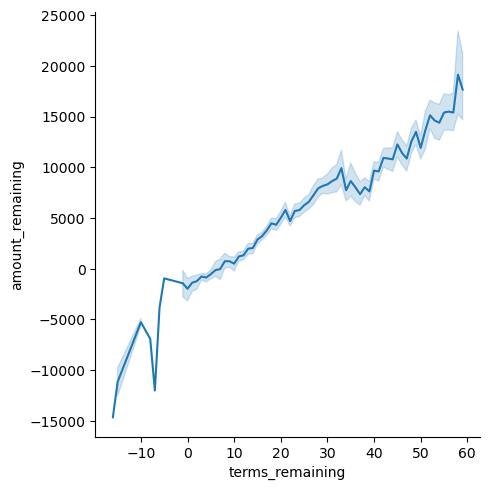

In [410]:
sns.relplot(data=charged_off_df, x="terms_remaining", y="amount_remaining", kind="line")


### Task 4: Possible loss

### Task 5: Indicators of loss

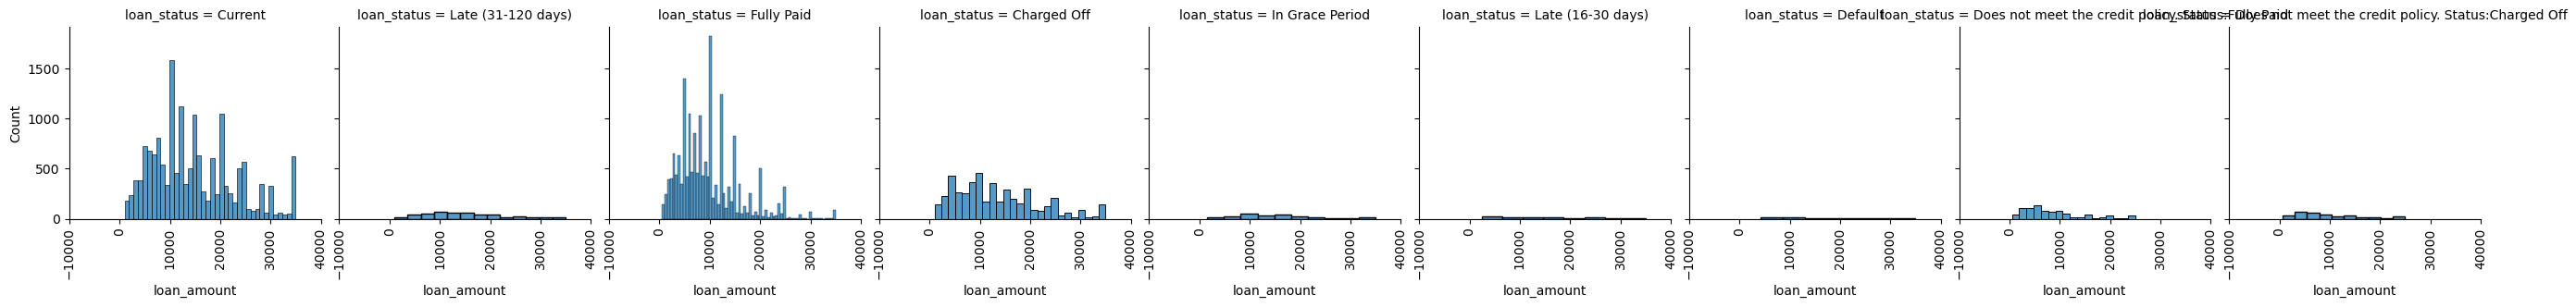

In [411]:
data_plot.plot_facet_grids(df_copy_filtered, "loan_amount", "loan_status")

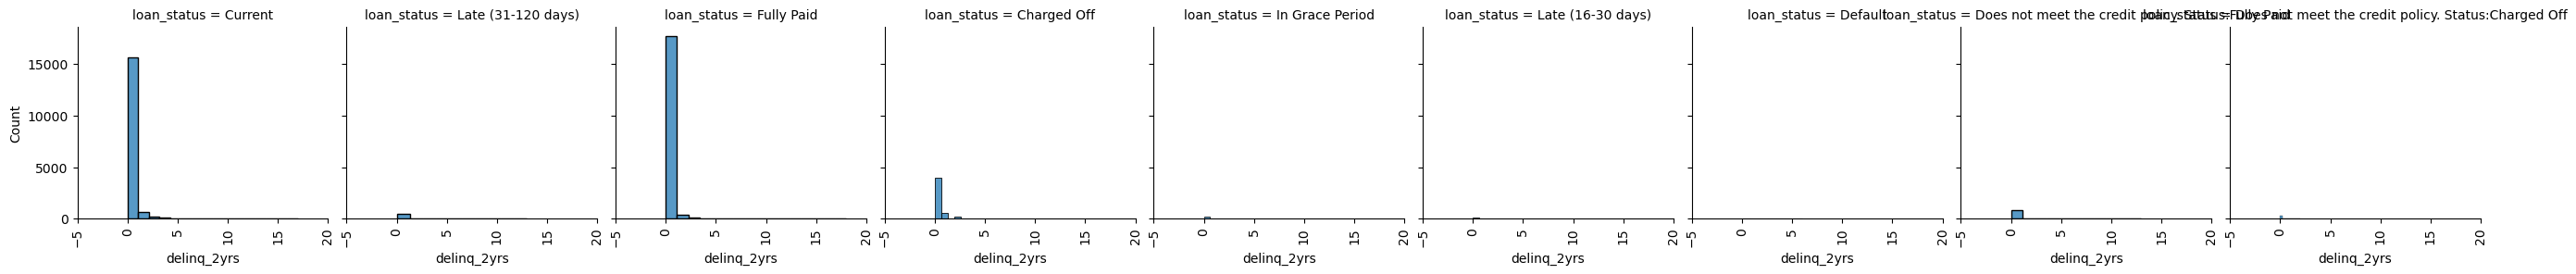

In [412]:
data_plot.plot_facet_grids(df_copy_filtered, "delinq_2yrs", "loan_status")

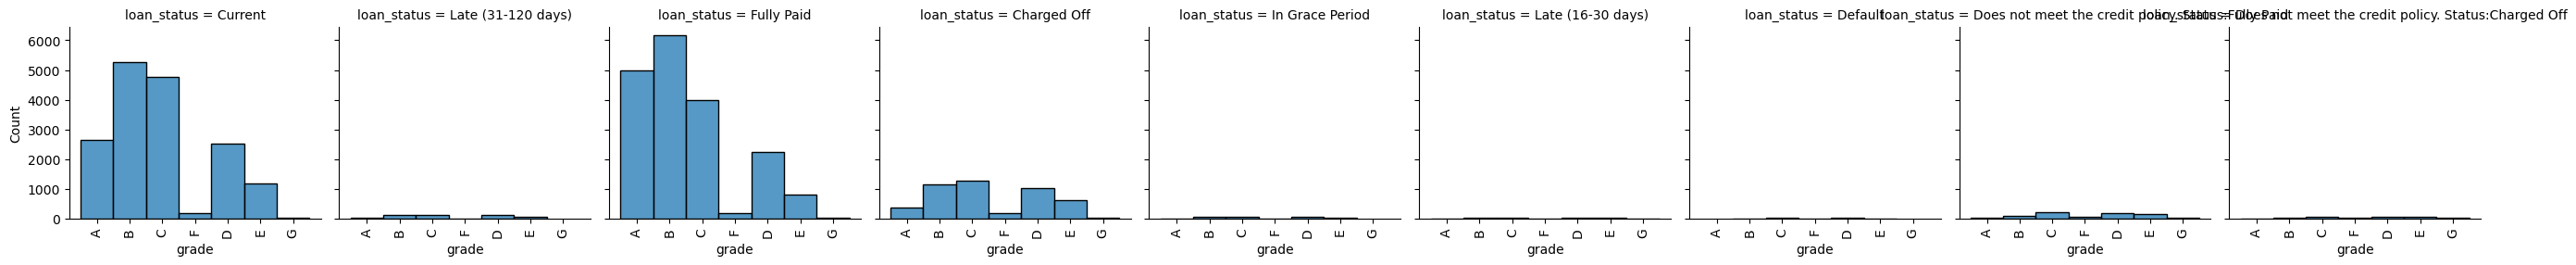

In [413]:
data_plot.plot_facet_grids(df_copy_filtered, "grade", "loan_status")

Loans with better grade have higher chance to pay off. 

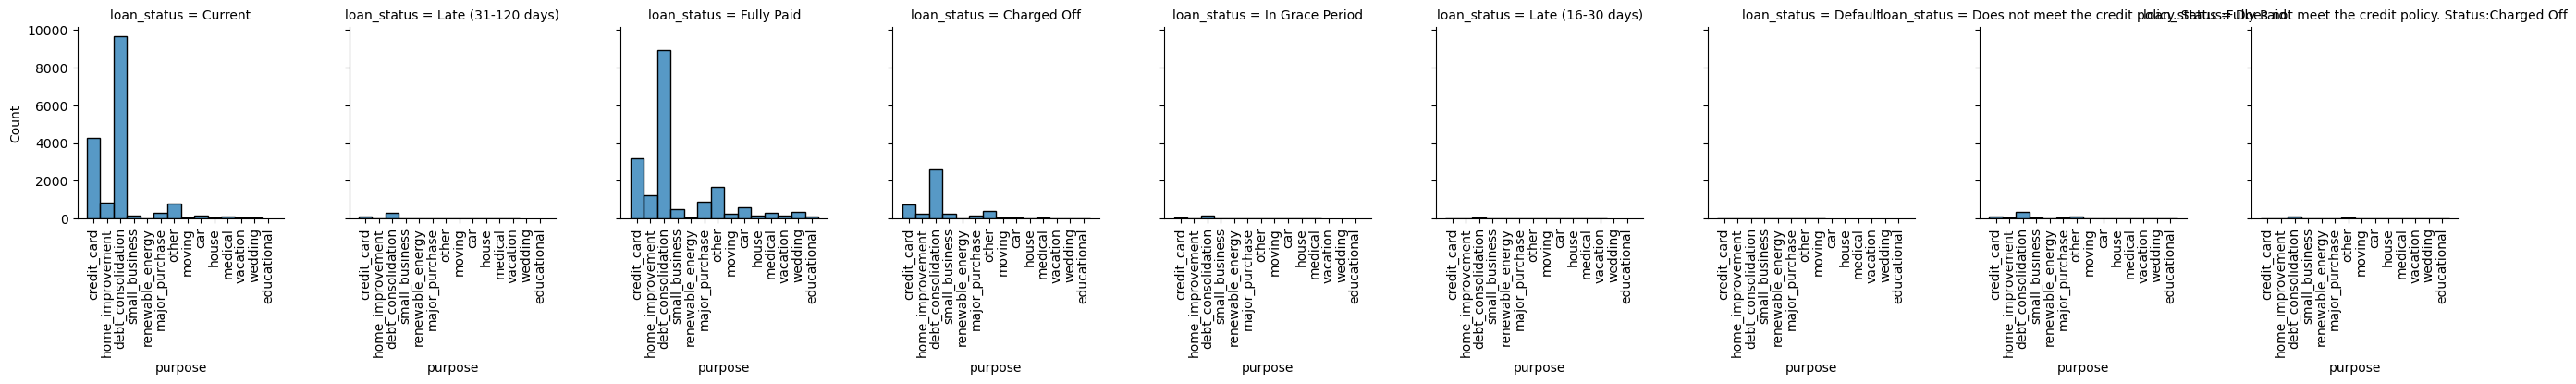

In [414]:
data_plot.plot_facet_grids(df_copy_filtered, "purpose", "loan_status")

Loans taken for debt_consolidation and credict_card purposes have higher chnaces of not being paid off. 

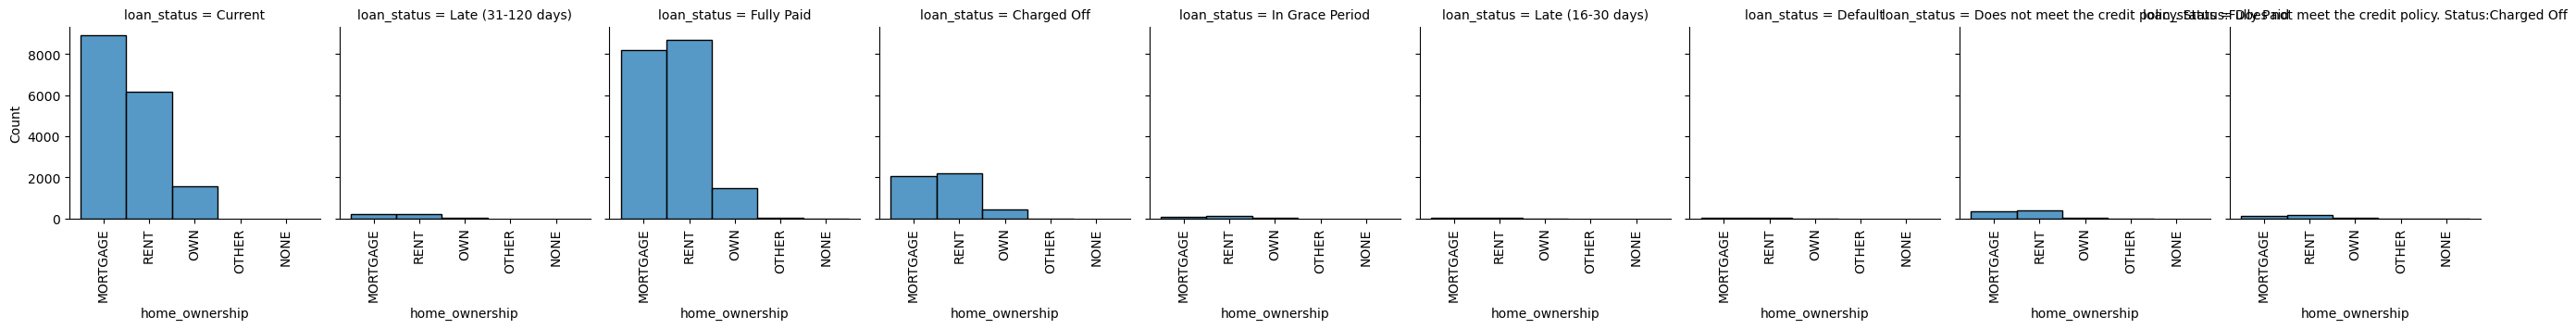

In [415]:
data_plot.plot_facet_grids(df_copy_filtered, "home_ownership", "loan_status")

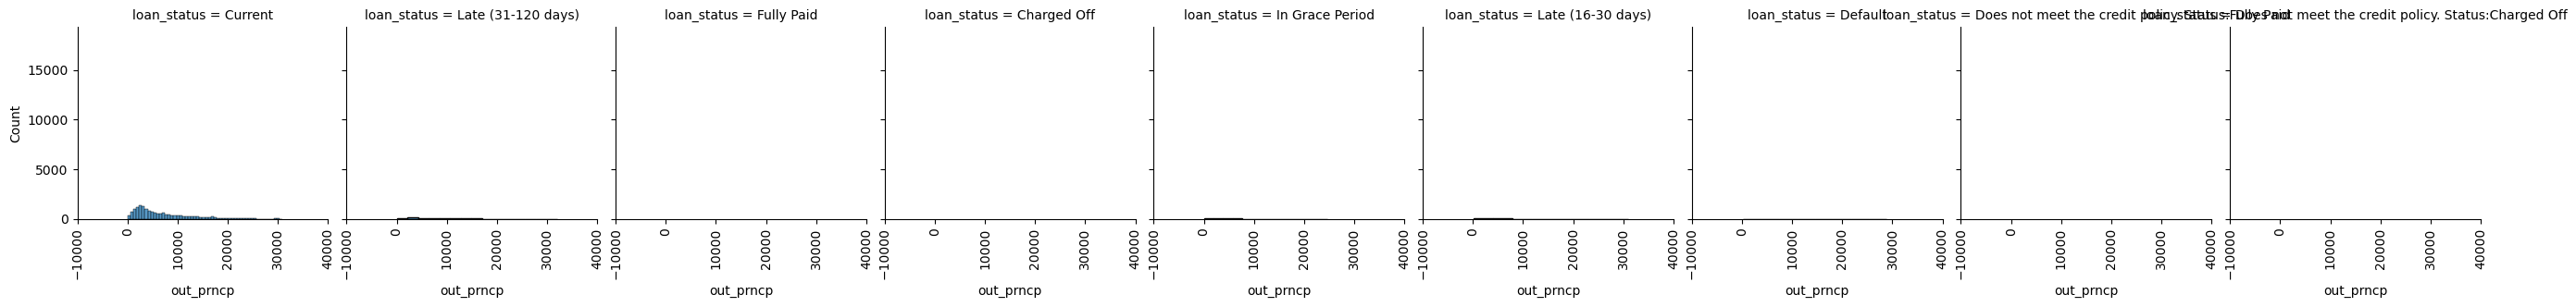

In [416]:
data_plot.plot_facet_grids(df_copy_filtered, "out_prncp", "loan_status")

Home ownership does not give any clear indication on the status of the loans. 